##DS 203- Course Project
##Topic Name - Qualitative and Quantitative Analysis of Environmental Awareness in Transport Sector
###Samyak Shah, 18D070062
###Neelkamal Bhuyan 180020058
###December 11, 2020

## Importing the necessary libraries

In [232]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Importing dataset and having a glance; understanding the attributes

In [233]:
emission_data = pd.read_csv('https://drive.google.com/uc?export=download&id=175MgXXFiZwDPswnk39jrnEUrdbDKvOyk')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (6,30) have mixed types.Specify dtype option on import or set low_memory=False.



In [234]:
for col in emission_data.columns:
  print(col,':',emission_data[col].dtype, '|', 'No. of null values: ',emission_data[col].isnull().sum(),'\n')

file : object | No. of null values:  0 

year : int64 | No. of null values:  0 

manufacturer : object | No. of null values:  0 

model : object | No. of null values:  0 

description : object | No. of null values:  0 

euro_standard : int64 | No. of null values:  0 

tax_band : object | No. of null values:  37674 

transmission : object | No. of null values:  10 

transmission_type : object | No. of null values:  341 

engine_capacity : float64 | No. of null values:  7 

fuel_type : object | No. of null values:  0 

urban_metric : float64 | No. of null values:  13 

extra_urban_metric : float64 | No. of null values:  13 

combined_metric : float64 | No. of null values:  7 

urban_imperial : float64 | No. of null values:  13 

extra_urban_imperial : float64 | No. of null values:  13 

combined_imperial : float64 | No. of null values:  7 

noise_level : float64 | No. of null values:  9 

co2 : int64 | No. of null values:  0 

thc_emissions : float64 | No. of null values:  22321 

co_emi

#### We see that the dataset is NOT CLEAN

#### Now we need to do some data cleaning so that each column is a definite data type with empty cells having null value of the respective data type

Furhter Data cleaning will be done as when needed

In [235]:
emission_data['file'] = emission_data['file'].astype(np.str)
emission_data['manufacturer'] = emission_data['manufacturer'].astype(np.str)
emission_data['model'] = emission_data['model'].astype(np.str)
emission_data['tax_band'] = emission_data['tax_band'].astype(np.str)
emission_data['description'] = emission_data['description'].astype(np.str)
emission_data['transmission'] = emission_data['transmission'].astype(np.str)
emission_data['transmission_type'] = emission_data['transmission_type'].astype(np.str)
emission_data['fuel_type'] = emission_data['fuel_type'].astype(np.str)
emission_data['date_of_change'] = emission_data['date_of_change'].astype(np.str)

Fuel Cost data is given some under 6000 miles aggregrate and rest under 12000 miles aggregate

This will be combined under one column of average fuel cost/mile

In [236]:
fuel_6000 = emission_data['fuel_cost_6000_miles']
fuel_6000[emission_data['fuel_cost_6000_miles'].isnull()] = 0
fuel_12000 = emission_data['fuel_cost_12000_miles']
fuel_12000[emission_data['fuel_cost_12000_miles'].isnull()] = 0
fuel_cost = (fuel_6000/6000) + (fuel_12000/12000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [237]:
emission_data = emission_data.drop(columns=['fuel_cost_6000_miles','fuel_cost_12000_miles'])
emission_data['fuel_cost'] = fuel_cost

In [238]:
emission_data

file  year  ... date_of_change fuel_cost
0                     DatapartC_july2000.csv  2000  ...            nan  0.103000
1                     DatapartC_july2000.csv  2000  ...            nan  0.105500
2                     DatapartC_july2000.csv  2000  ...            nan  0.110500
3                     DatapartC_july2000.csv  2000  ...            nan  0.104333
4                     DatapartC_july2000.csv  2000  ...            nan  0.105500
...                                      ...   ...  ...            ...       ...
45506  download-data-for-Aug-2013-Euro-6.csv  2013  ...            nan  0.109667
45507  download-data-for-Aug-2013-Euro-6.csv  2013  ...            nan  0.133167
45508  download-data-for-Aug-2013-Euro-6.csv  2013  ...            nan  0.133167
45509  download-data-for-Aug-2013-Euro-6.csv  2013  ...            nan  0.142250
45510  download-data-for-Aug-2013-Euro-6.csv  2013  ...            nan  0.142250

[45511 rows x 30 columns]

# Year-wise Analysis

In [239]:
yr_wise = emission_data.groupby('year')

Analysing Emission of Carbon dioxide, carbon monoxide and Nitrous oxides and also NOise Pollution

In [240]:
yr_co2 = yr_wise['co2'].mean()
yr_co = yr_wise['co_emissions'].mean()
yr_nox = yr_wise['nox_emissions'].mean()
yr_fuel = yr_wise['fuel_cost'].mean()
yr_noise = yr_wise['noise_level'].mean()

Text(0.5, 1.0, 'Year wise Noise pollution in dB')

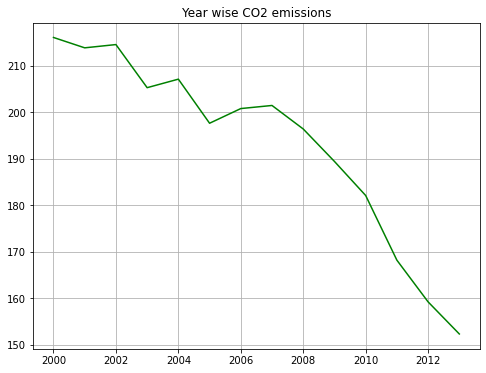

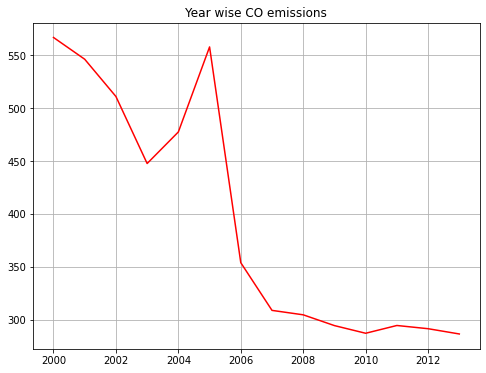

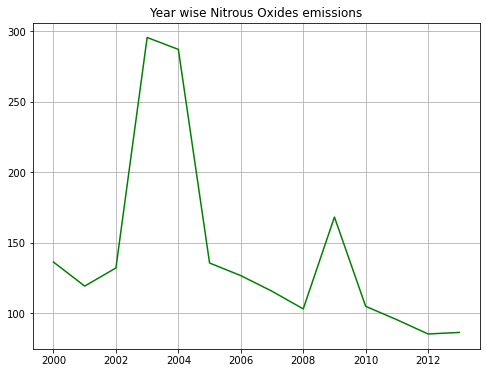

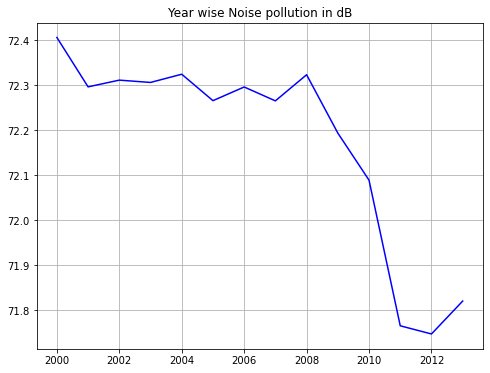

In [241]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(2000,2014),yr_co2,color = random.choice(np.array(['blue','green','red','magenta','black'])))
plt.grid()
plt.title('Year wise CO2 emissions')

plt.figure(figsize=(8,6))
plt.plot(np.arange(2000,2014),yr_co,color = random.choice(np.array(['blue','green','red','magenta','black'])))
plt.grid()
plt.title('Year wise CO emissions')

plt.figure(figsize=(8,6))
plt.plot(np.arange(2000,2014),yr_nox,color = random.choice(np.array(['blue','green','red','magenta','black'])))
plt.grid()
plt.title('Year wise Nitrous Oxides emissions')

plt.figure(figsize=(8,6))
plt.plot(np.arange(2000,2014),yr_noise,color = random.choice(np.array(['blue','green','red','magenta','black'])))
plt.grid()
plt.title('Year wise Noise pollution in dB')

# Conclusions



1.   CO2 emissions have been steadily reducing over the years
2.   Except a peak in 2005, CO emissions are also reducing over the years
3. Nitorus Oxide emissions have not reduced significantly over the years. In addition to that we have high NOX pollution in 2003,2004 and 2009
4. Significant decrease in Noise POllution has been between 2008 and 2011 



# Analysing Fuel cost trend with pollution trend

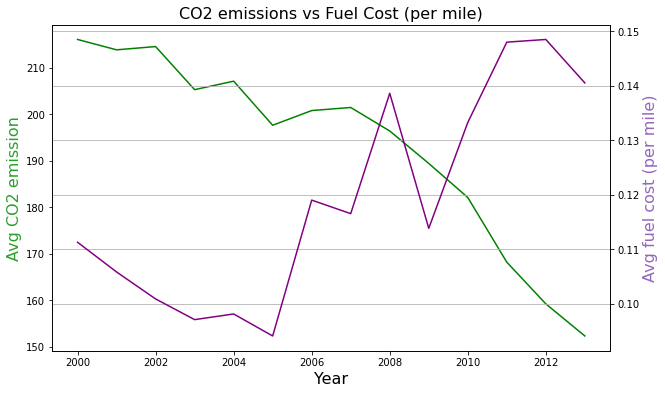

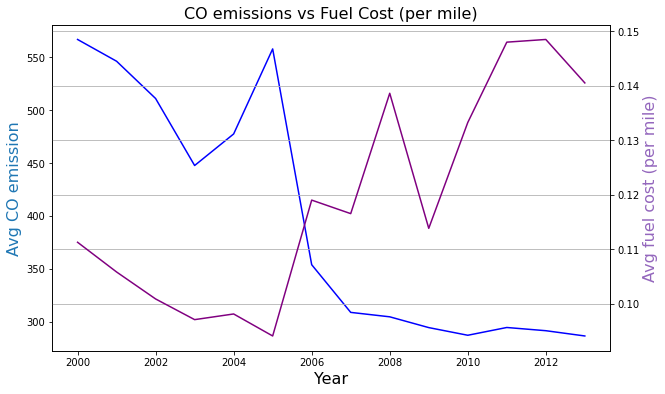

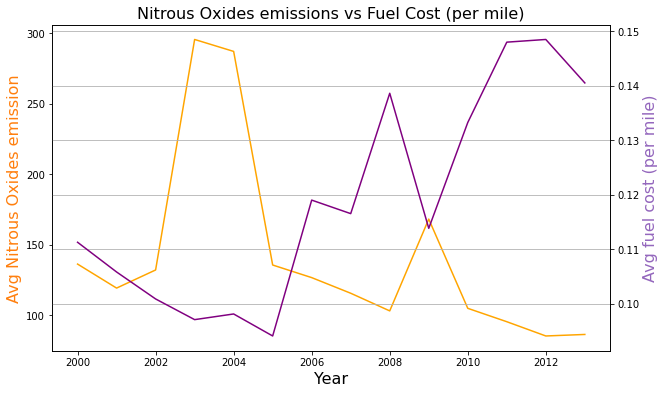

In [242]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('CO2 emissions vs Fuel Cost (per mile)', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Avg CO2 emission', fontsize=16, color=color)
ax2 = plt.plot(np.arange(2000,2014),yr_co2,'green')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Avg fuel cost (per mile)', fontsize=16, color=color)
ax2 = plt.plot(np.arange(2000,2014),yr_fuel,'purple')
#ax2.tick_params(axis='y', color=color)
plt.grid()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:blue'
ax1.set_title('CO emissions vs Fuel Cost (per mile)', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Avg CO emission', fontsize=16, color=color)
ax2 = plt.plot(np.arange(2000,2014),yr_co,'blue')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Avg fuel cost (per mile)', fontsize=16, color=color)
ax2 = plt.plot(np.arange(2000,2014),yr_fuel,'purple')
#ax2.tick_params(axis='y', color=color)
plt.grid()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:orange'
ax1.set_title('Nitrous Oxides emissions vs Fuel Cost (per mile)', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Avg Nitrous Oxides emission', fontsize=16, color=color)
ax2 = plt.plot(np.arange(2000,2014),yr_nox,'orange')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Avg fuel cost (per mile)', fontsize=16, color=color)
ax2 = plt.plot(np.arange(2000,2014),yr_fuel,'purple')
#ax2.tick_params(axis='y', color=color)
plt.grid()
plt.show()

# Conclusion

Across the years it is observed that as we are trying to **reduce emissions** it is getting **costlier to run a vehicle**

# Evolution of Euro Standards based of pollution level trends

In [243]:
euro_std_wise = emission_data.groupby('euro_standard')

In [244]:
yr_co2 = euro_std_wise['co2'].mean()
yr_co = euro_std_wise['co_emissions'].mean()
yr_nox = euro_std_wise['nox_emissions'].mean()
yr_fuel = euro_std_wise['fuel_cost'].mean()
yr_noise = euro_std_wise['noise_level'].mean()

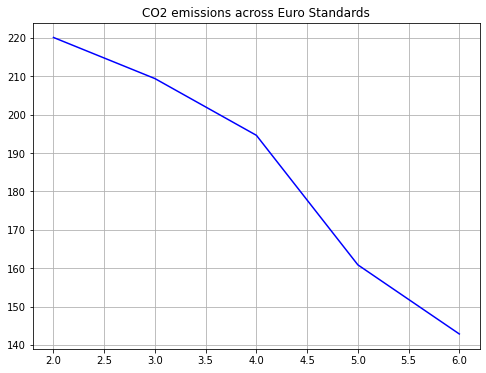

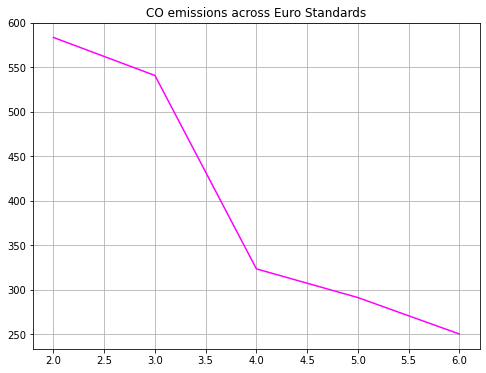

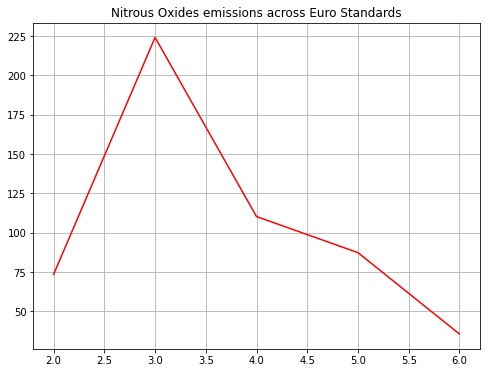

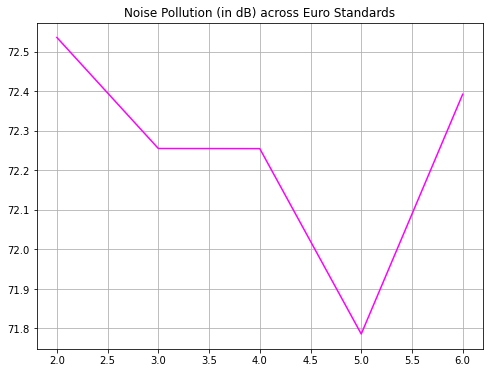

In [245]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,7),yr_co2,color = random.choice(np.array(['blue','green','red','magenta','black'])))
plt.title('CO2 emissions across Euro Standards')
plt.grid()

plt.figure(figsize=(8,6))
plt.plot(np.arange(2,7),yr_co,color = random.choice(np.array(['blue','green','red','magenta','black'])))
plt.title('CO emissions across Euro Standards')
plt.grid()

plt.figure(figsize=(8,6))
plt.plot(np.arange(2,7),yr_nox,color = random.choice(np.array(['blue','green','red','magenta','black'])))
plt.title('Nitrous Oxides emissions across Euro Standards')
plt.grid()

plt.figure(figsize=(8,6))
plt.plot(np.arange(2,7),yr_noise,color = random.choice(np.array(['blue','green','red','magenta','black'])))
plt.title('Noise Pollution (in dB) across Euro Standards')
plt.grid()


# Conclusions



1.   Across all Euro Standards CO2, CO and Nitrous Oxide emissions are decreasing except fron the peak in NOX emissions from standard 2 to 3
2.   This goes to show that the governments have been constantly trying to reduce impact of transport on environment
3. In addition to that Noise pollution also seems to deccrese in general, except for the case of standard 5 to 6



# How Engine Capacity has changed through Euro Standards

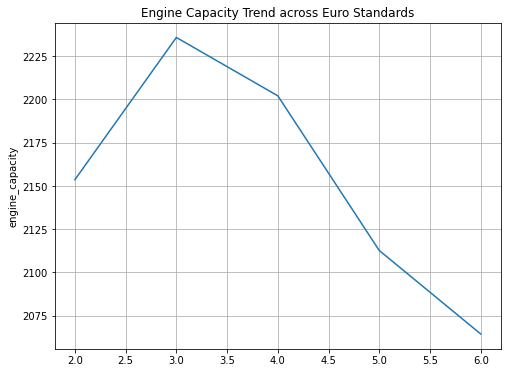

In [246]:
eng_cap = euro_std_wise['engine_capacity'].mean()
plt.figure(figsize=(8,6))
sns.lineplot(x=np.arange(2,7),y=eng_cap)
plt.title('Engine Capacity Trend across Euro Standards')
plt.grid()


# Conclusions

Apart from the increase from Euro Standard 2 to 3, the engine capacity of vehicles, in general, seem to decrease

# Per mile Fuel Cost for each fuel type in each Euro Standard

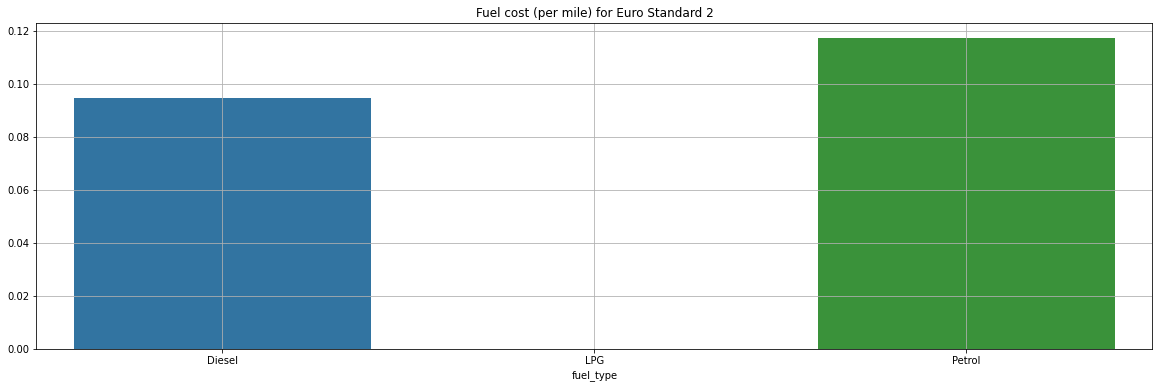

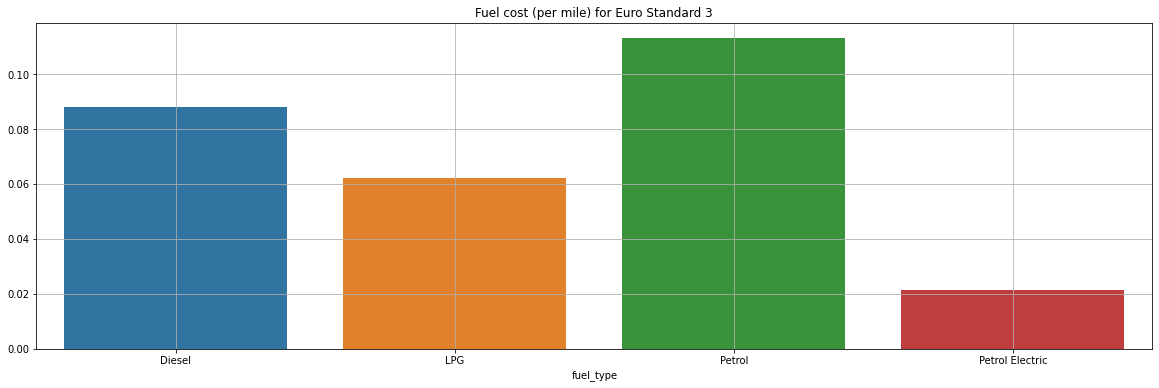

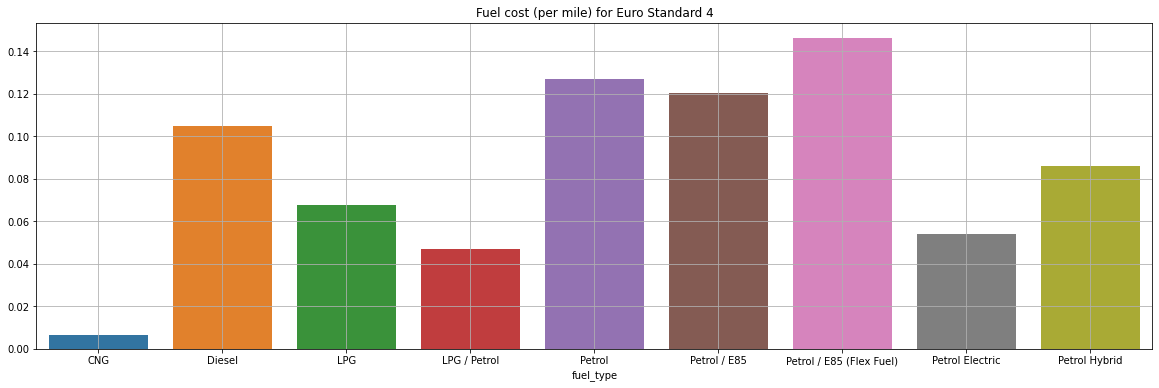

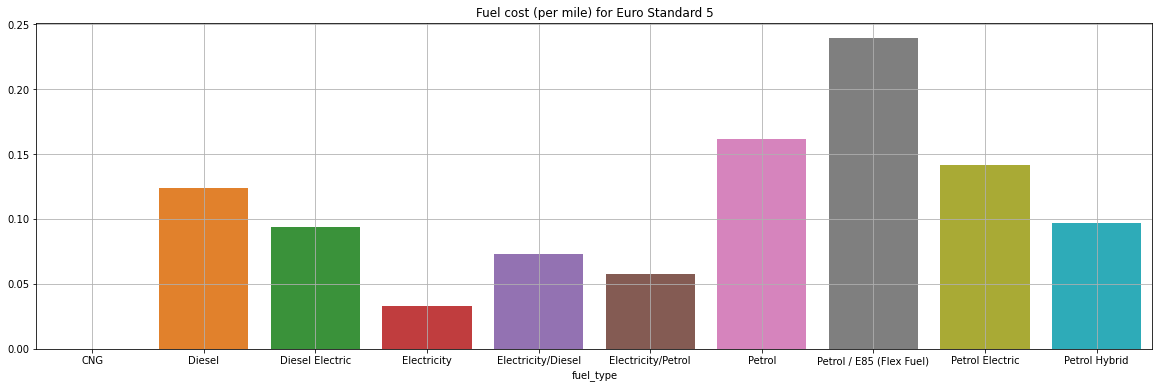

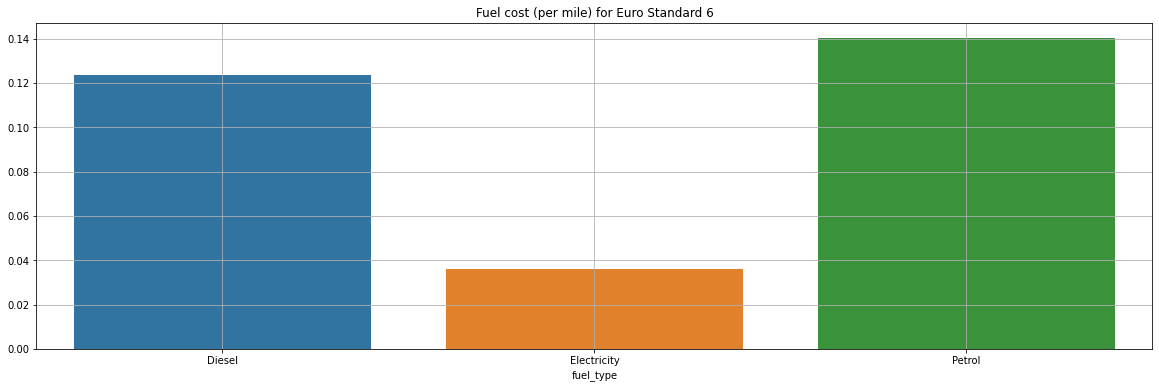

In [247]:
euro_std_fuel = emission_data.groupby(['euro_standard','fuel_type'])
fuel_type_cost = euro_std_fuel['fuel_cost'].mean()
for es in np.arange(2,7):
  plt.figure(figsize=(20,6))
  sns.barplot(x=fuel_type_cost[es].keys(),y=fuel_type_cost[es].values)
  plt.title('Fuel cost (per mile) for Euro Standard '+str(es))
  plt.grid()


# Conclusions

Note that Fuel cost refers to cost of running based on money spent on fuel, am indication of mileage

1.   In all Euro standards, Petrol cars seem to be the costliest to run, based on money spent on fuel/mile
2.   Diesel-run vehicles follow petrol-run ones very closely in all Euro Standards
3. It is observed across the Euro Standards that couplinng traditional petrol/diesel vehicles with hybrid/electric technology reduces the cost of running significantly
4. All electric cars, introduced in Euro Standard 6, have a significantly lower cost of running compared tp petrol and diesel counterparts



# Studying which fuel-type cars are most popular in each Euro Standard

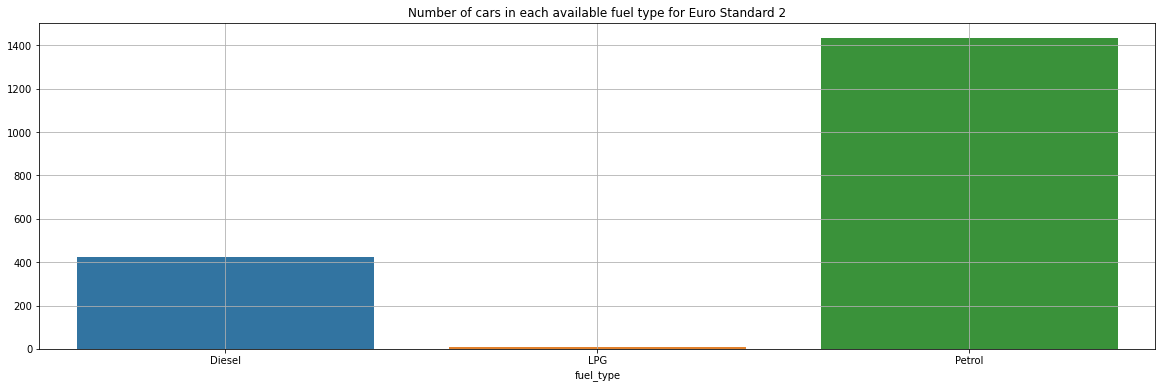

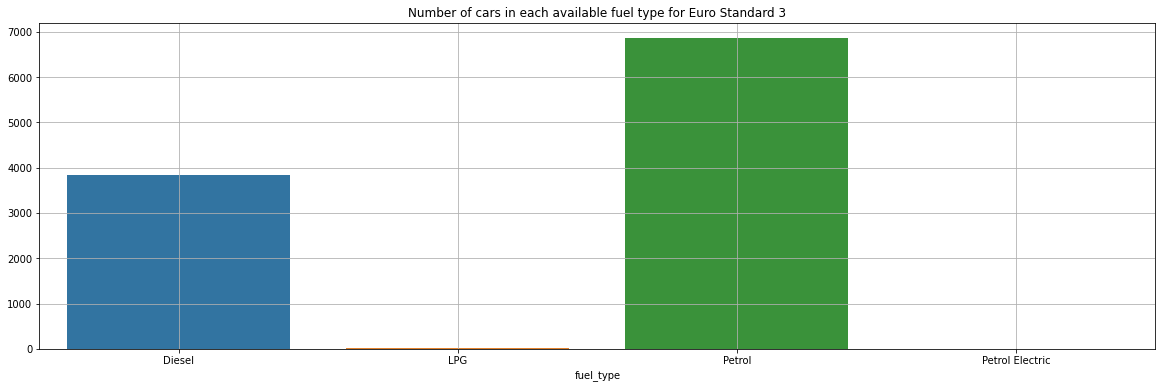

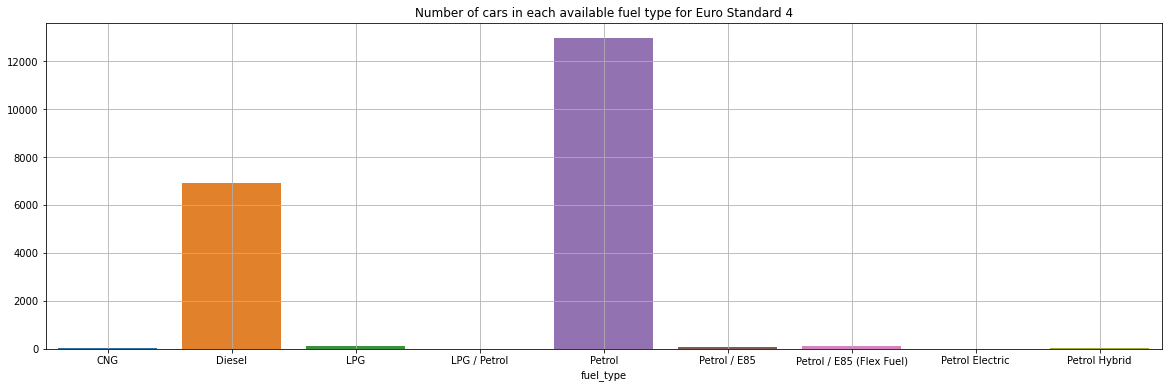

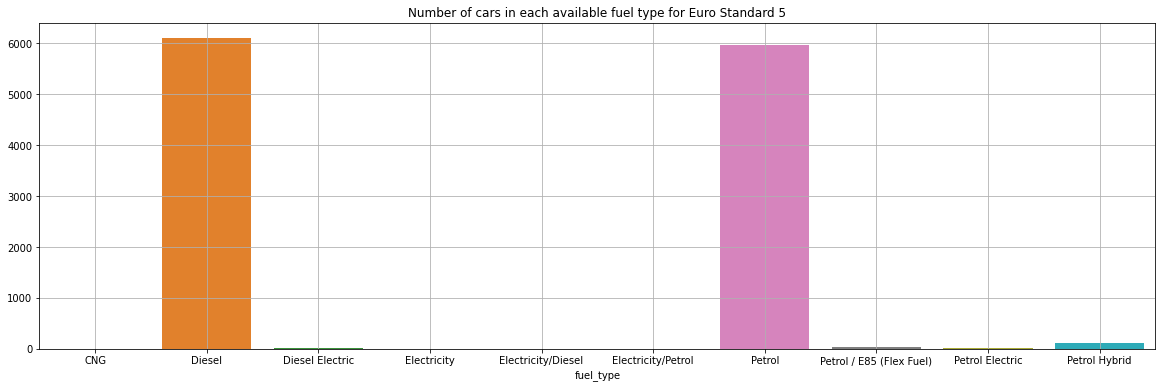

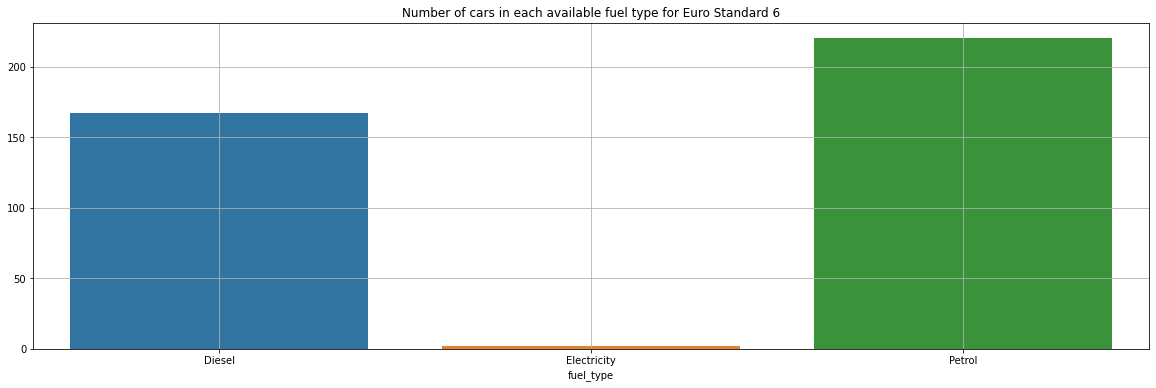

In [248]:
fuel_used = euro_std_fuel.size()
for es in np.arange(2,7):
  plt.figure(figsize=(20,6))
  sns.barplot(x=fuel_used[es].keys(),y=fuel_used[es].values)
  plt.title('Number of cars in each available fuel type for Euro Standard '+str(es))
  plt.grid()


# Conclusions

Across all Euro standards Petrol and Diesel cars are the most sought after with Petrol being more popular among the two (except in Euro Standard 5)


# Manufacturer-wise Analysis

In [249]:
company_yr_wise = emission_data.groupby(['manufacturer','year'])
companies = emission_data['manufacturer'].unique()

# Average yearly CO2 emissions of each company

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



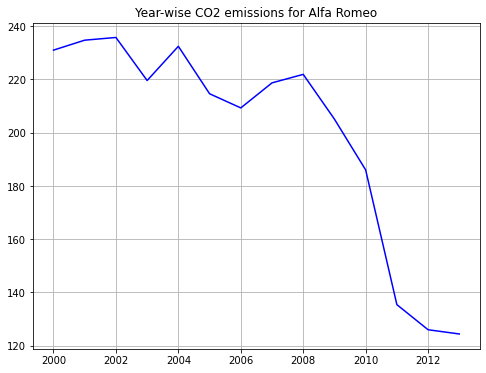

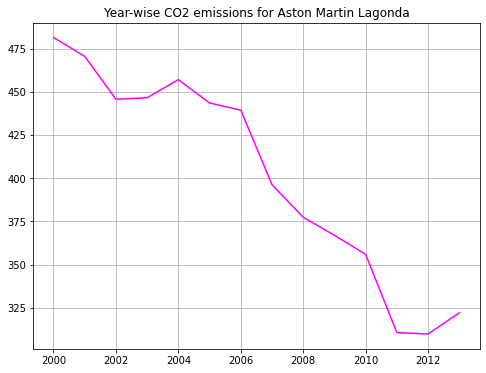

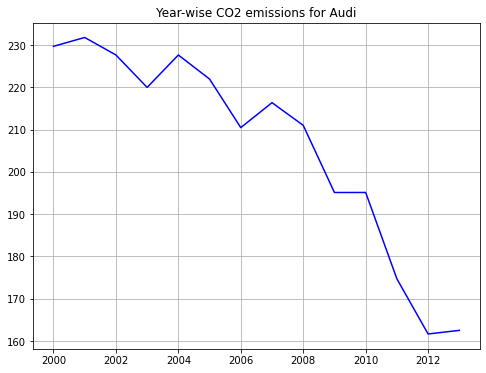

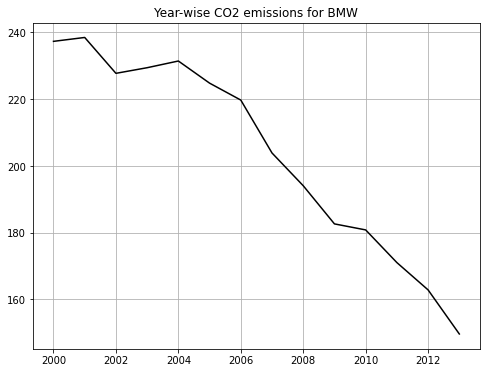

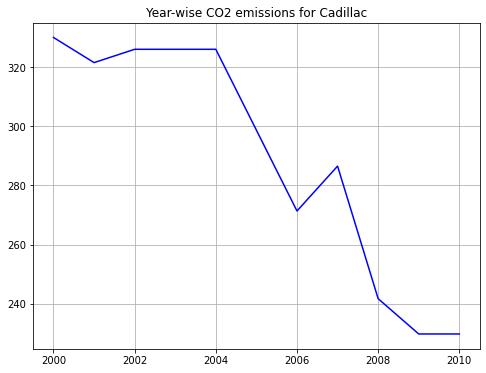

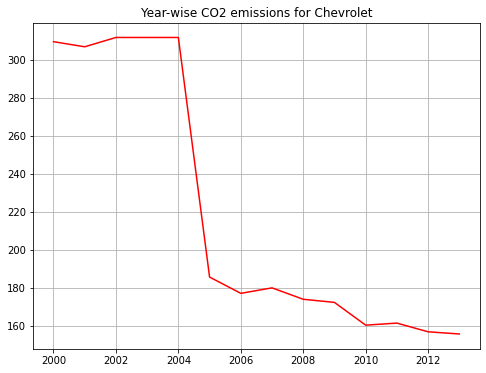

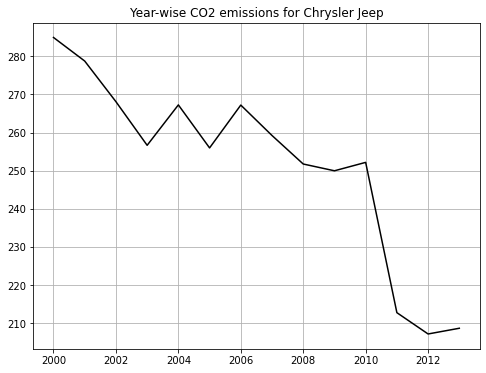

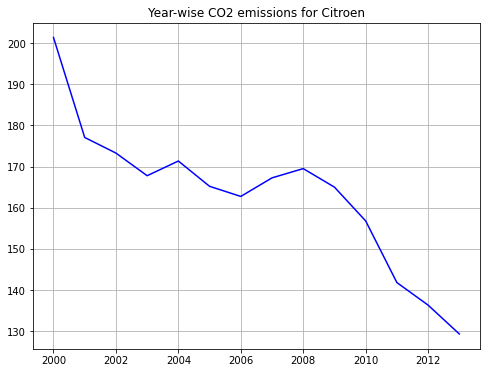

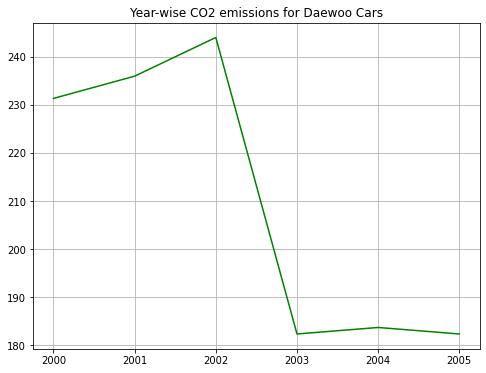

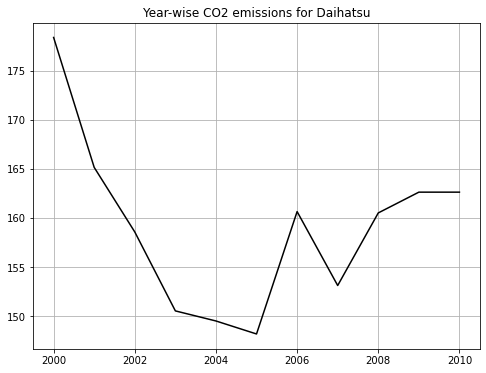

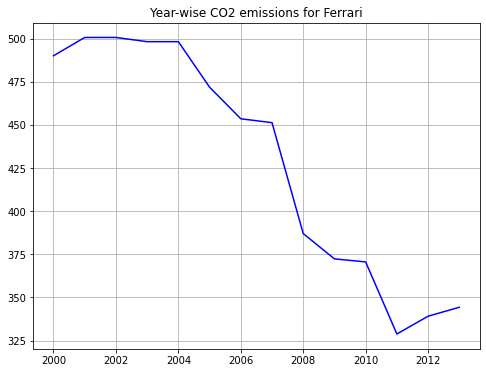

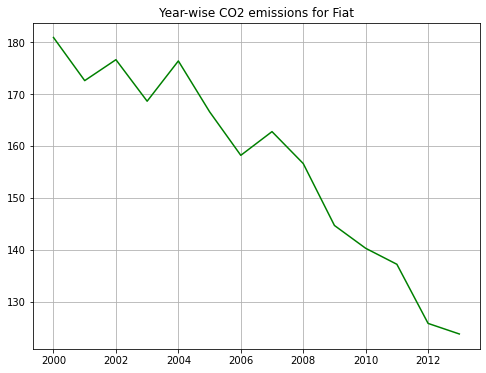

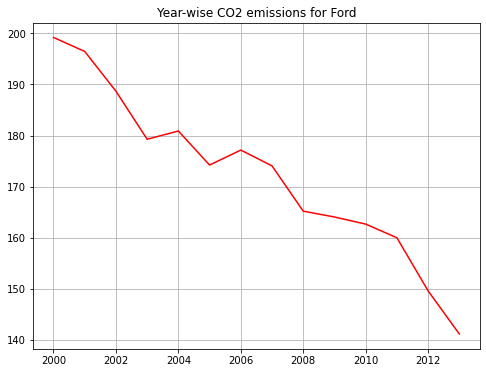

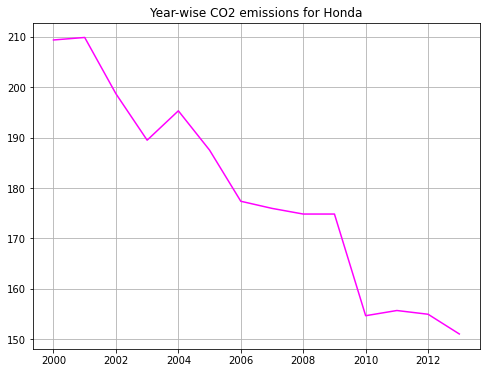

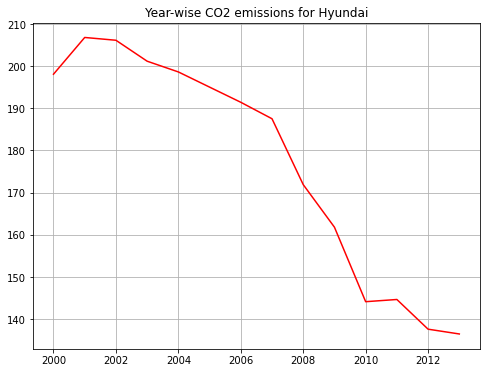

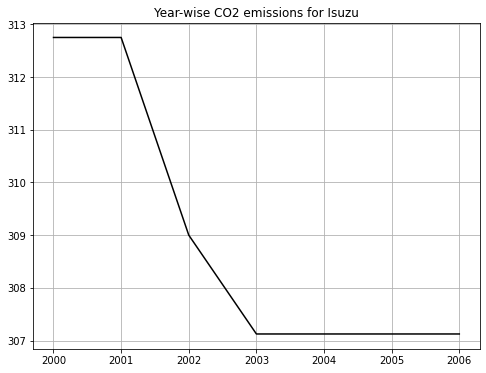

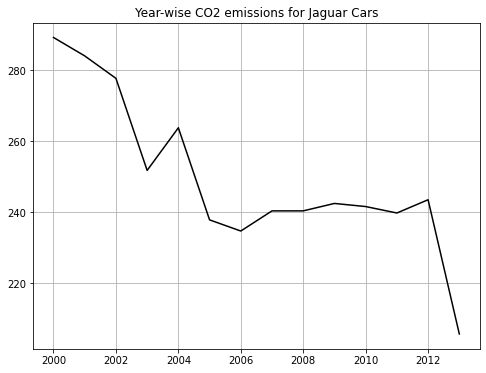

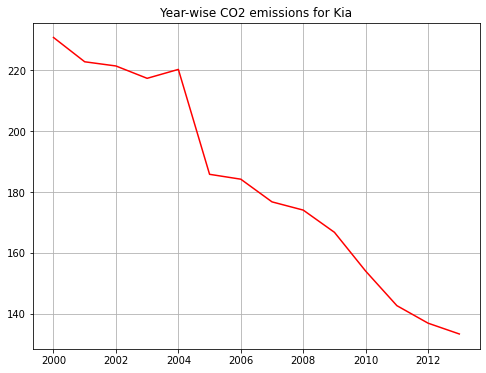

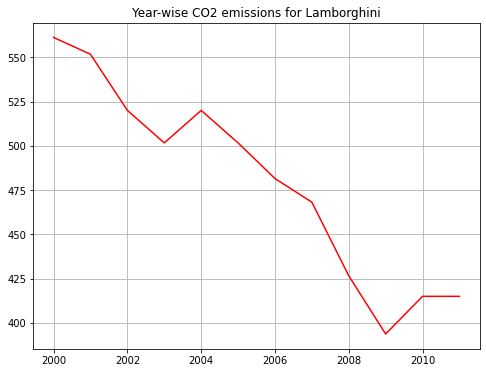

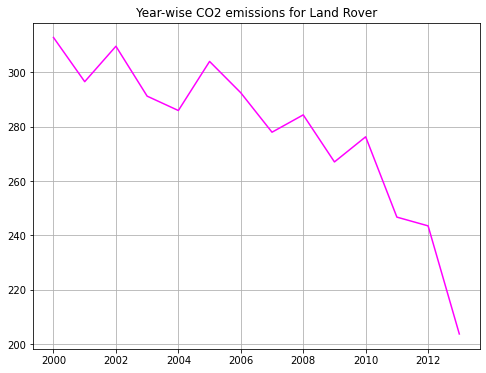

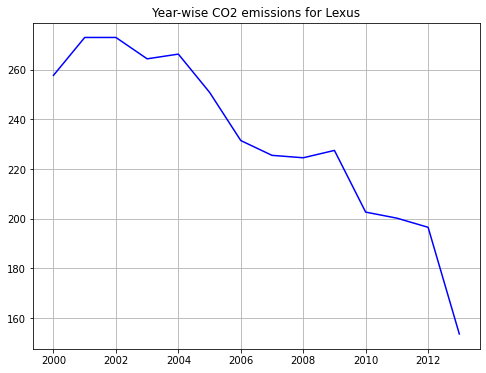

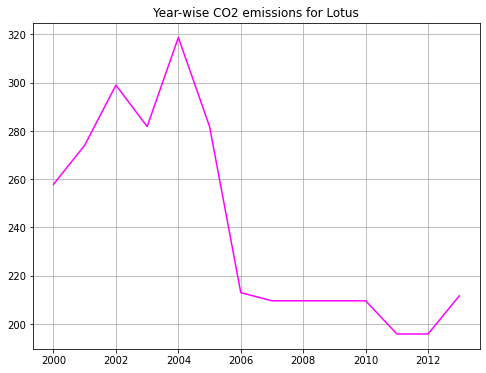

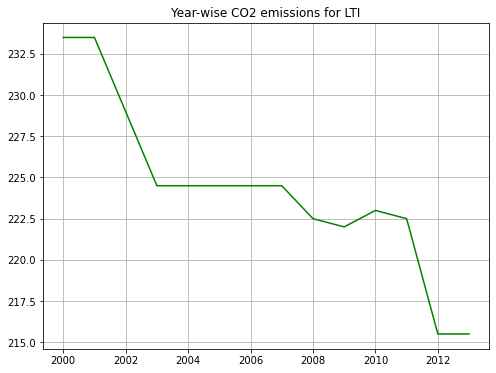

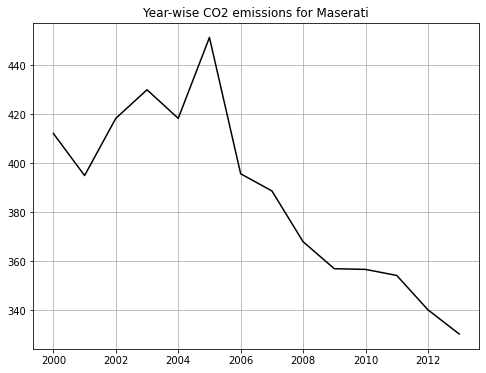

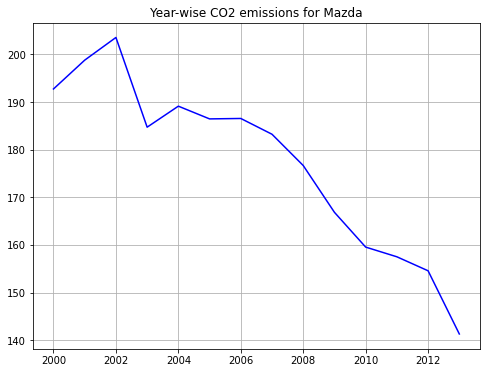

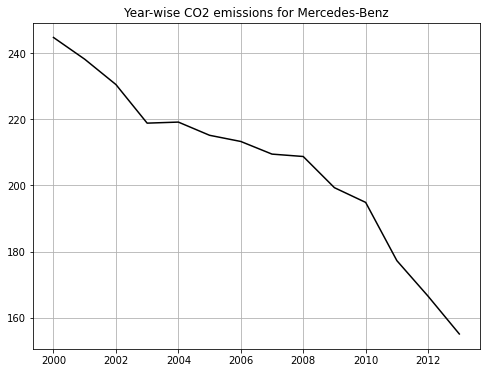

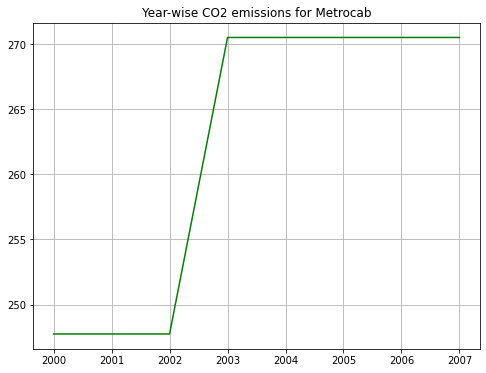

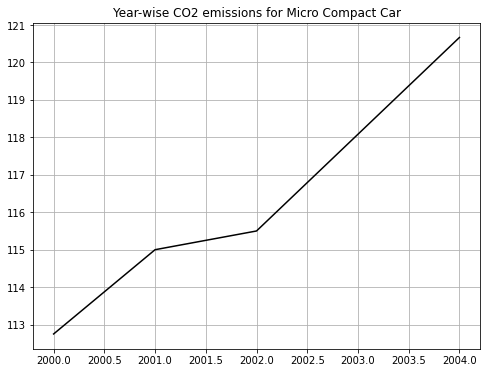

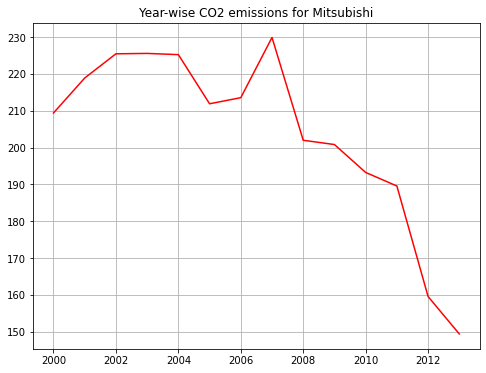

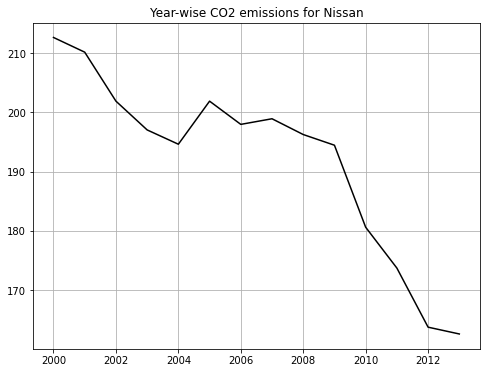

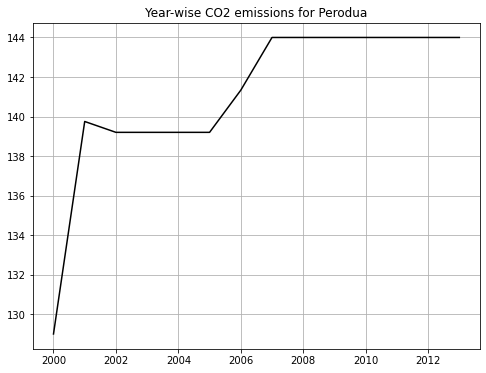

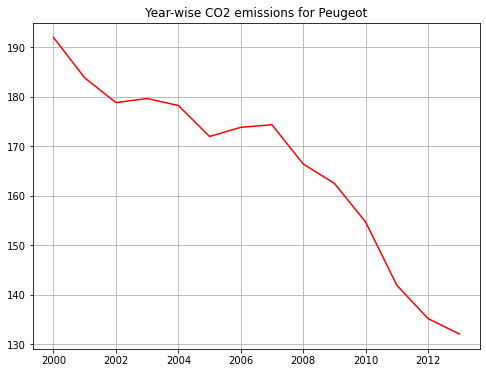

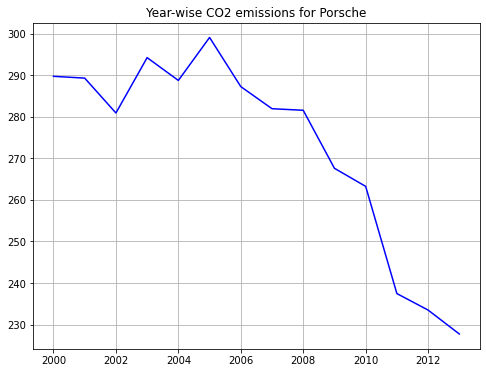

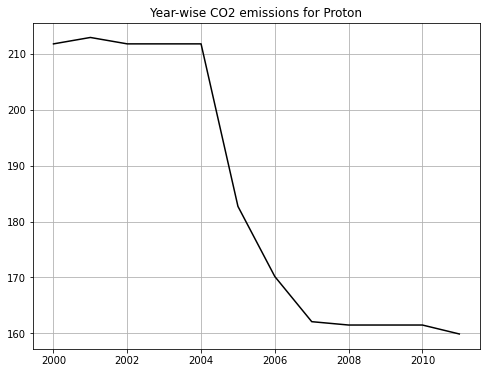

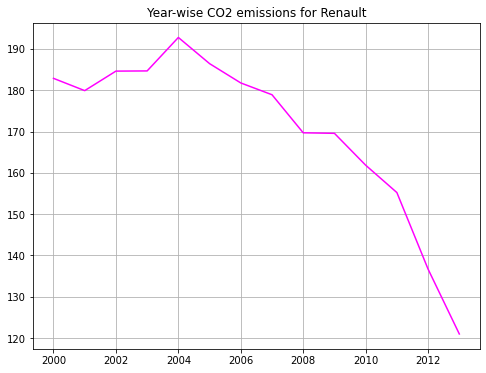

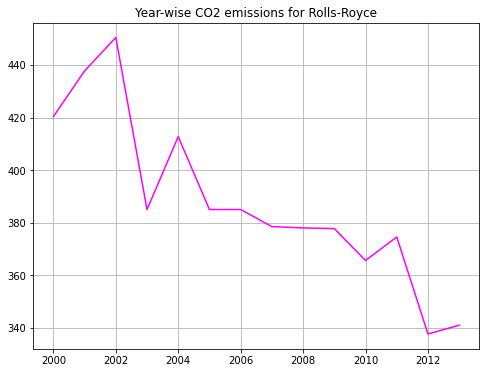

<Figure size 576x432 with 0 Axes>

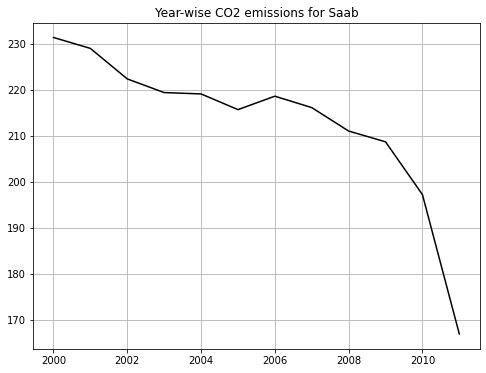

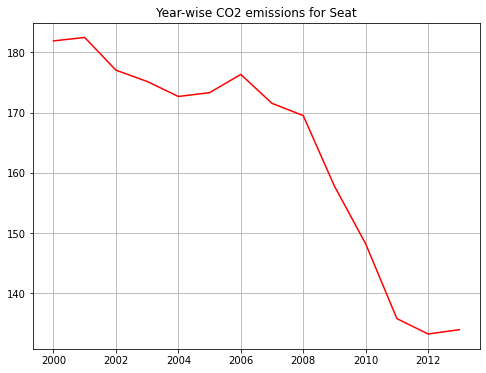

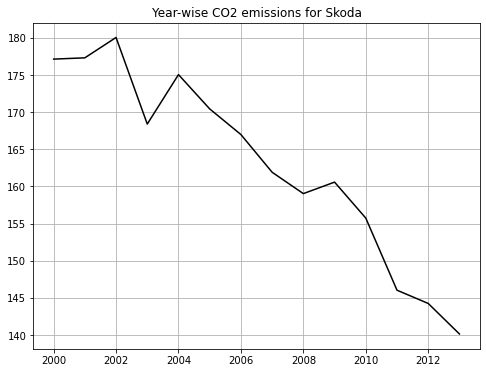

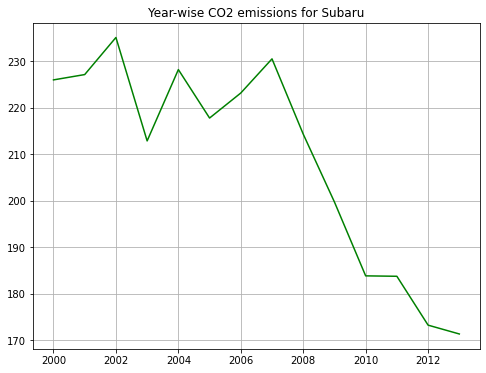

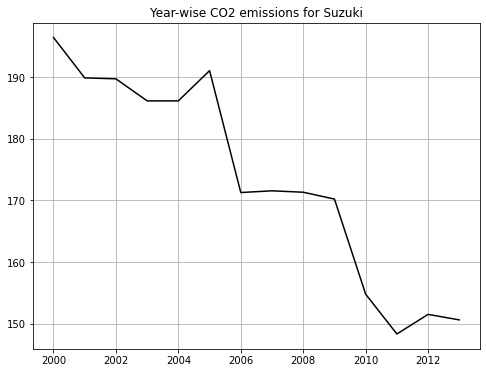

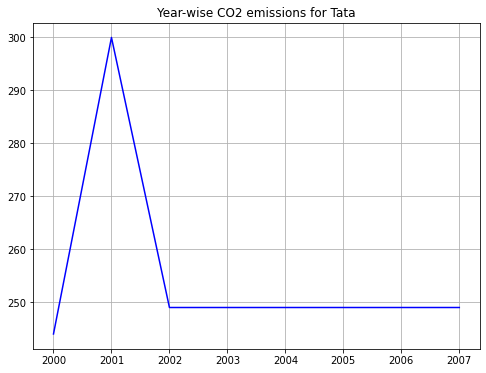

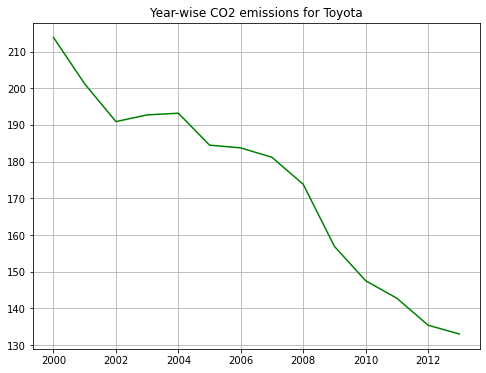

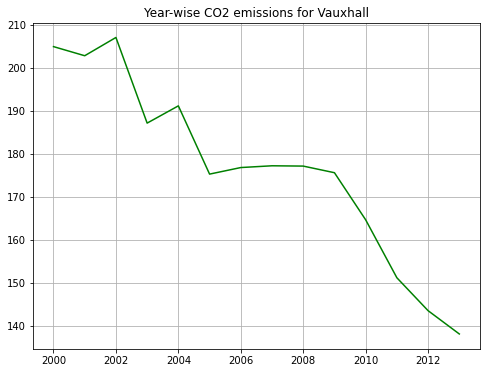

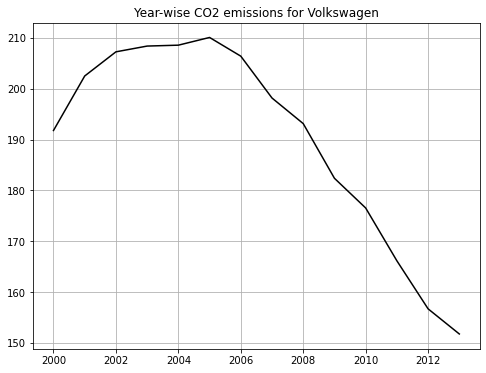

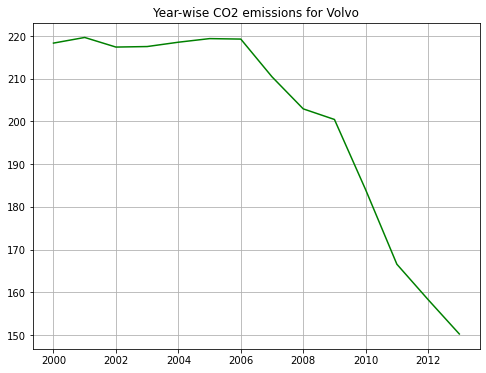

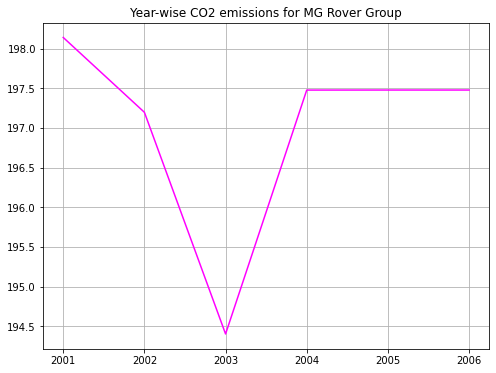

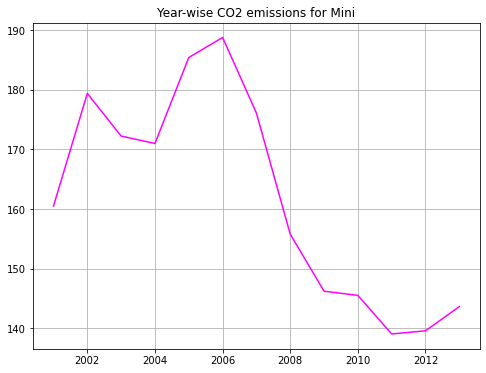

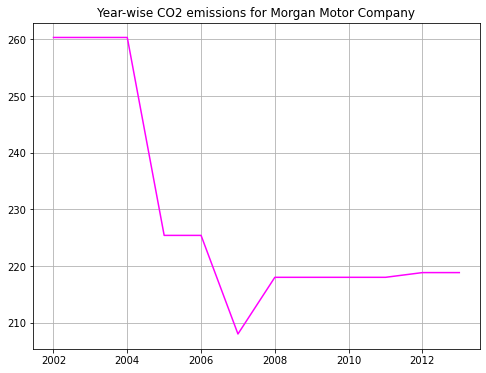

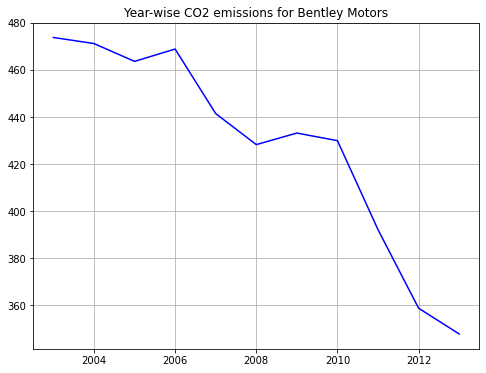

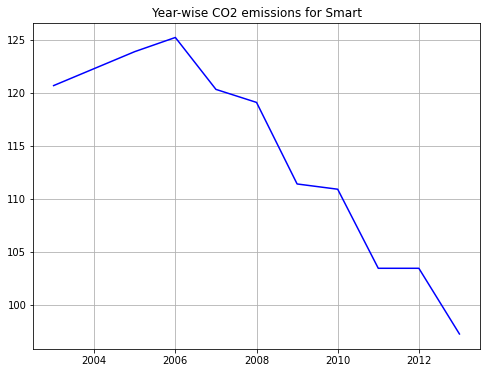

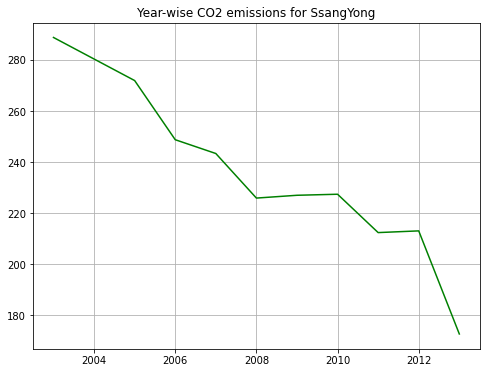

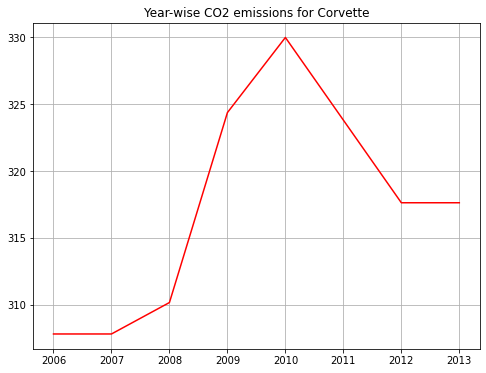

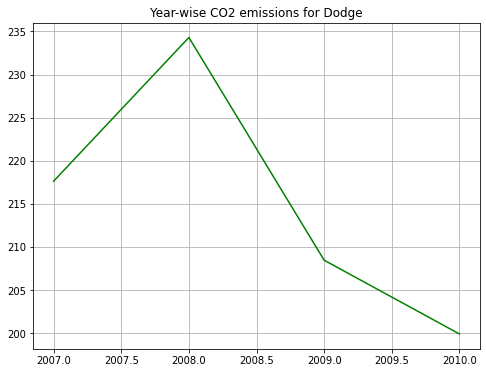

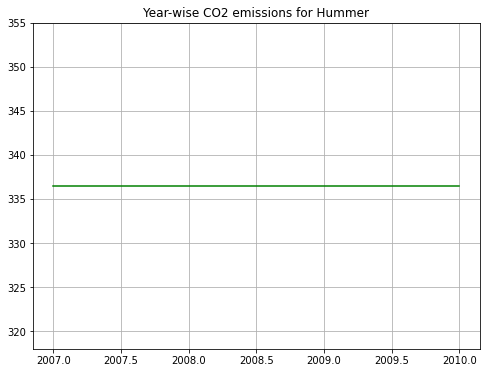

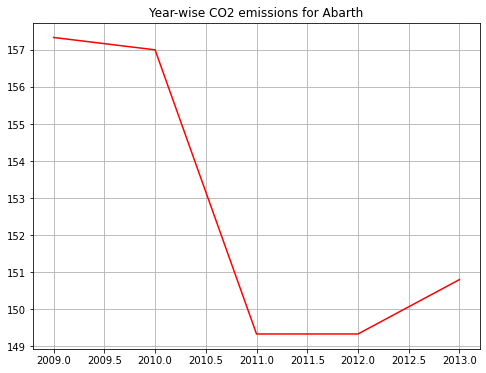

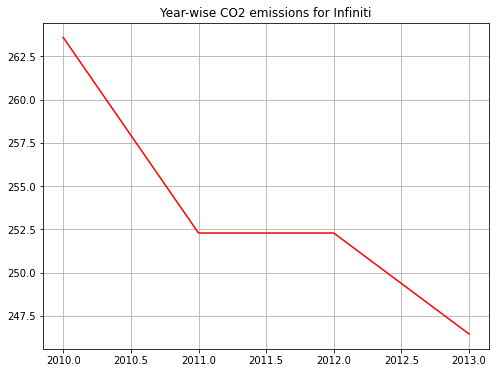

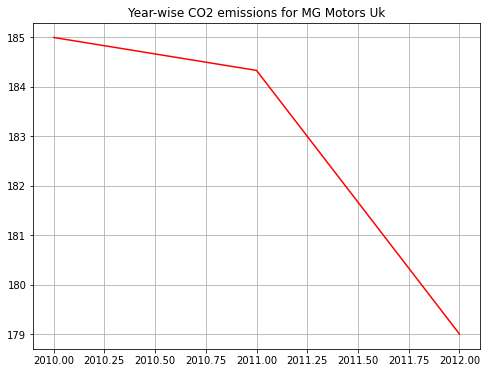

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [250]:
for company in  companies:
  plt.figure(figsize=(8,6))
  if len(company_yr_wise['co2'].mean()[company]) < 3: continue
  plt.plot(company_yr_wise['co2'].mean()[company],color = random.choice(np.array(['blue','green','red','magenta','black'])))
  plt.title('Year-wise CO2 emissions for '+company)
  plt.grid()


# Conclusions from CO2 emission trends of each company



1.   Most companies have done a good job at reducing CO2 emissions with a peak in one year
2.   Metrocab, Micro Compact Car and Perodua have increasing trend and hence need to focus on reducing CO2 emissions in their cars
3. Corvette had an increasing trend initially but in recent years seem to have attended to this issue as seen by the decreasing trend thereafter
4. Daihatsu and MG Rover group had decreasing emissions but now have increasing emissions




# Average yearly CO emissions of each company

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



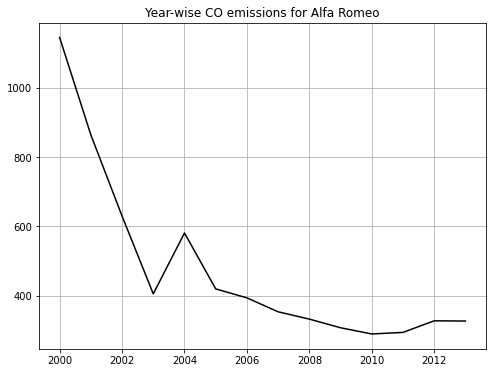

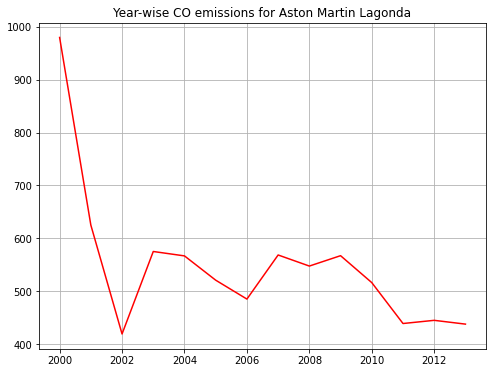

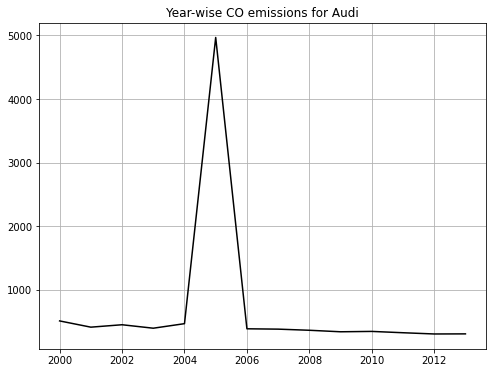

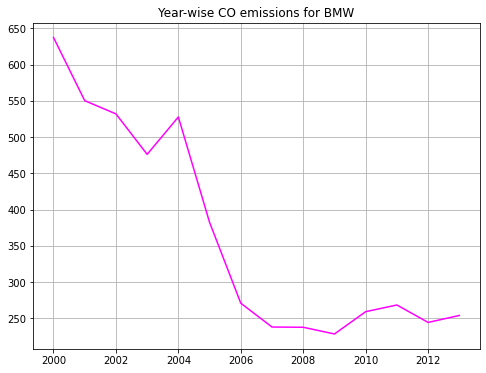

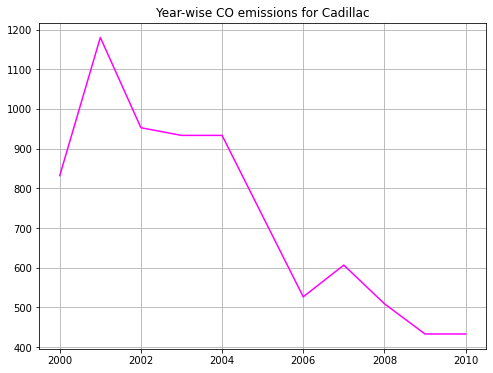

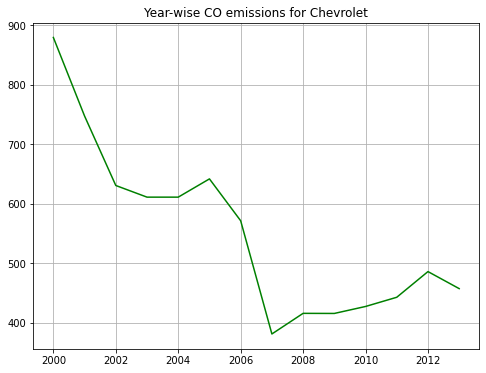

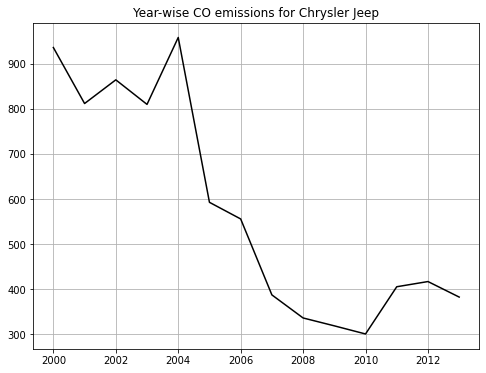

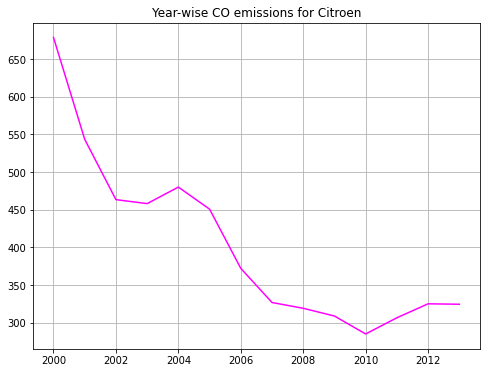

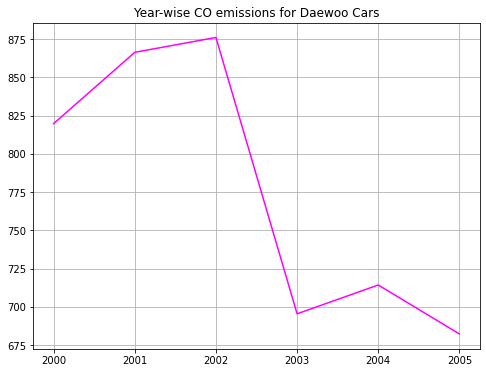

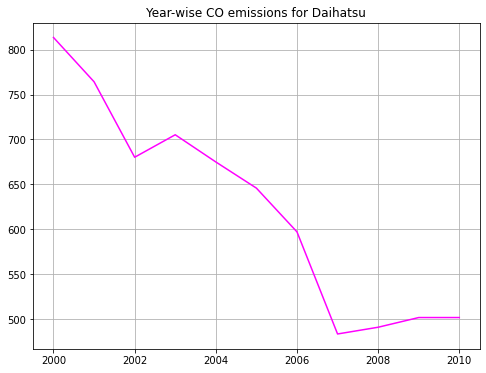

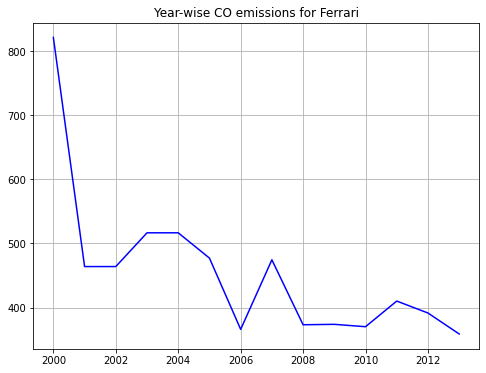

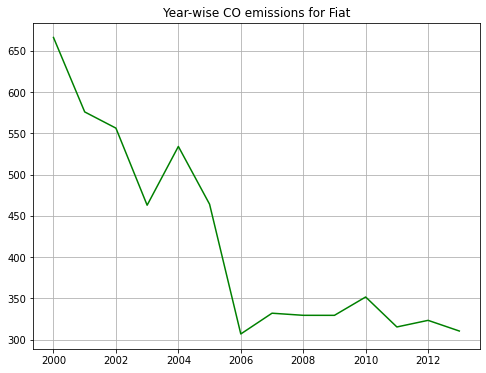

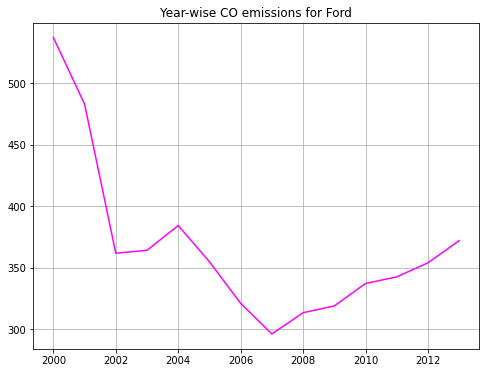

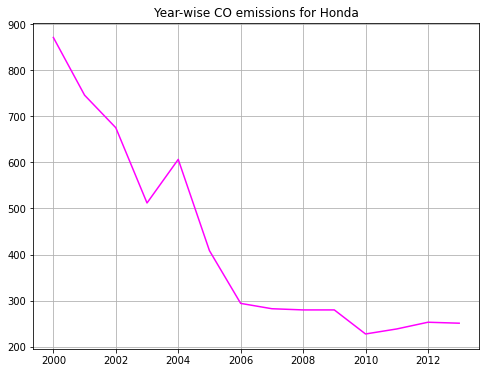

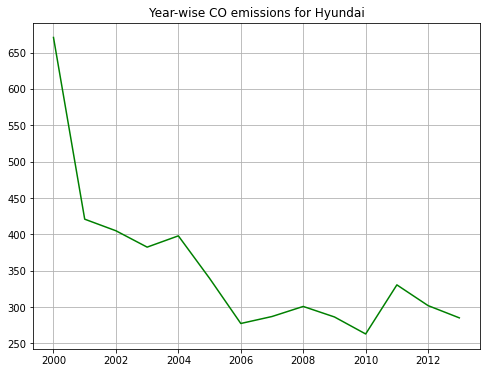

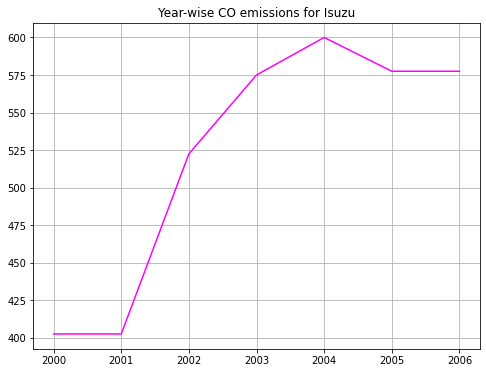

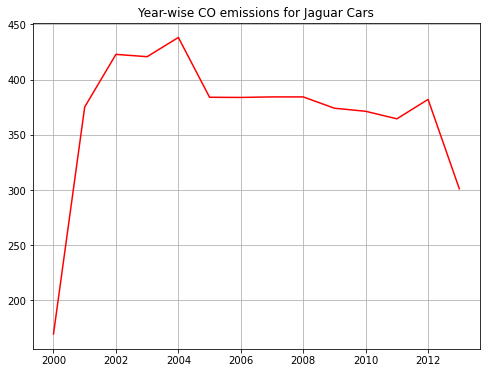

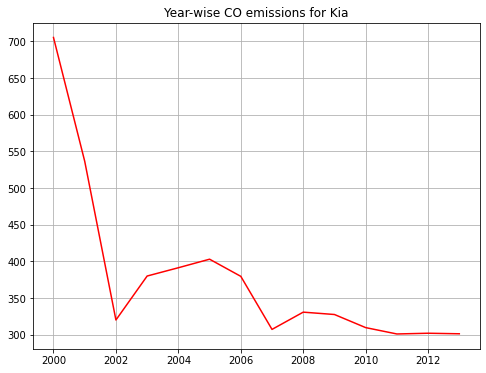

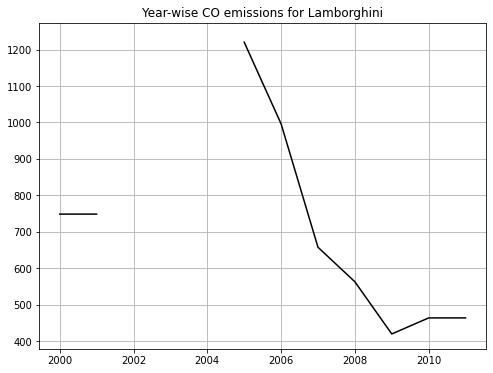

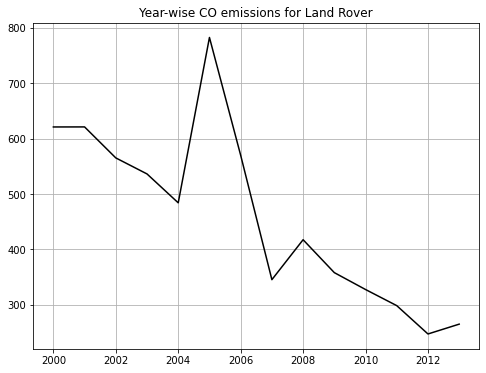

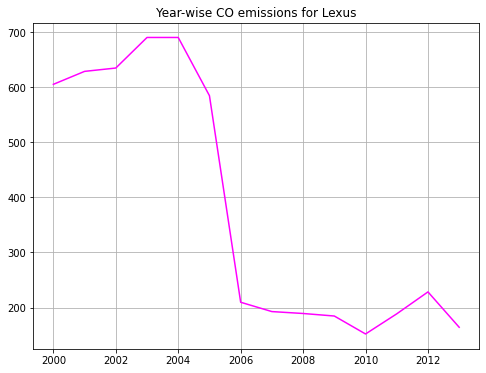

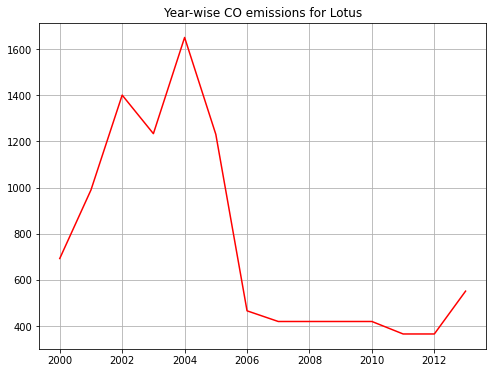

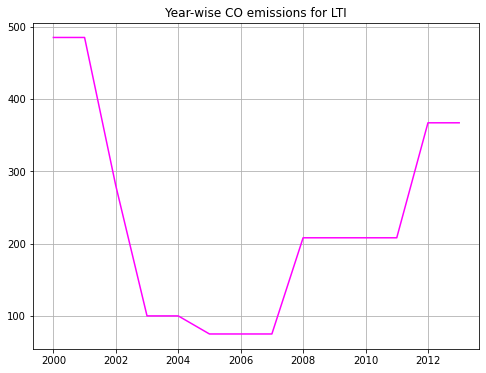

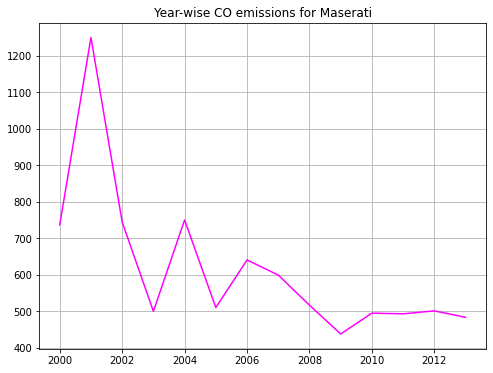

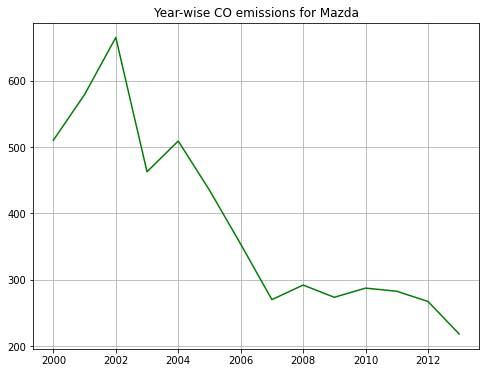

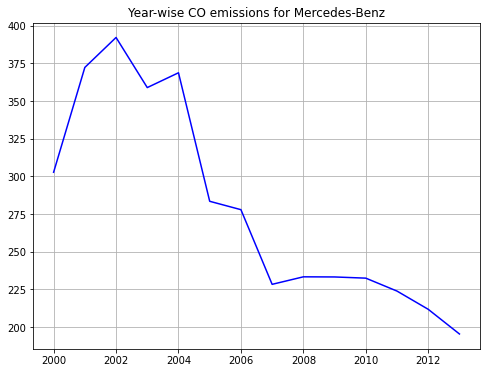

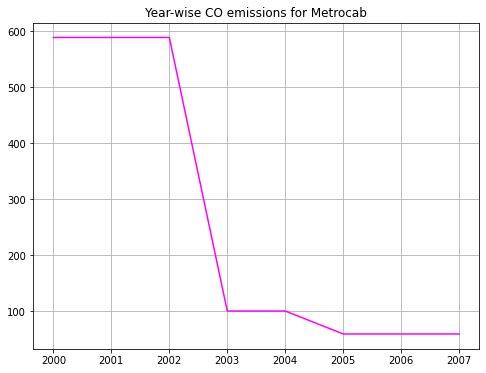

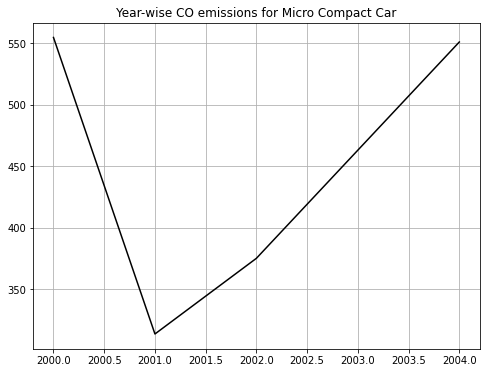

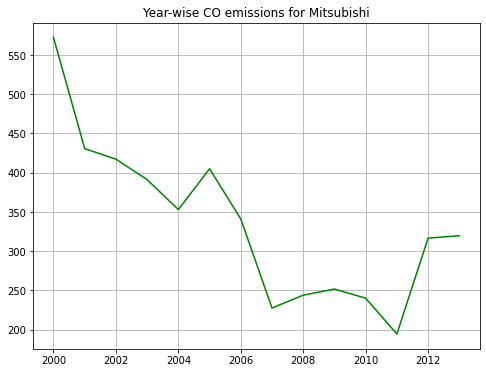

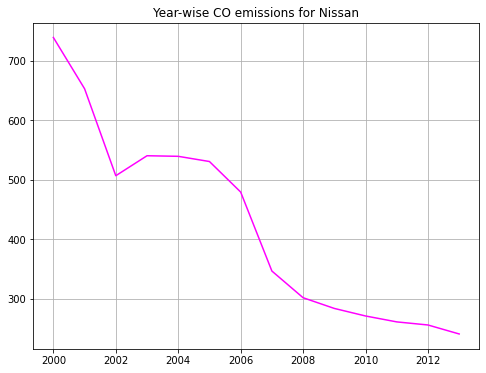

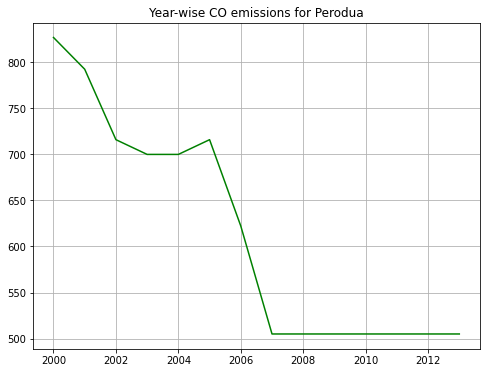

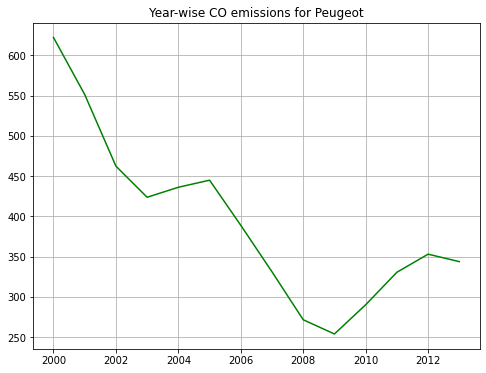

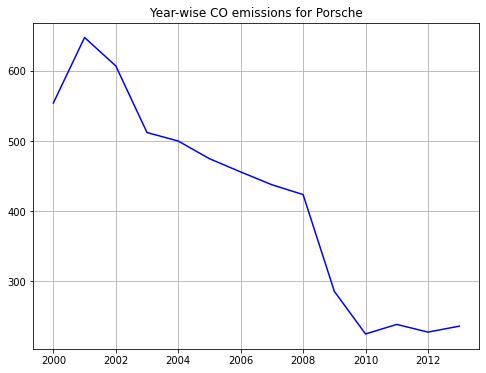

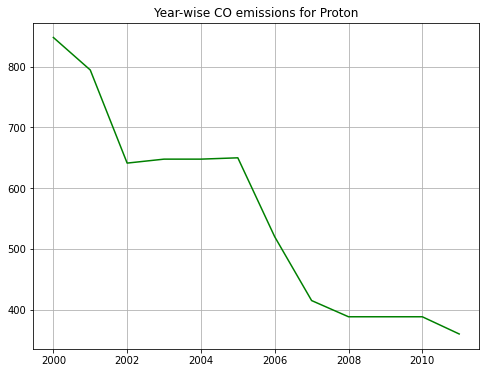

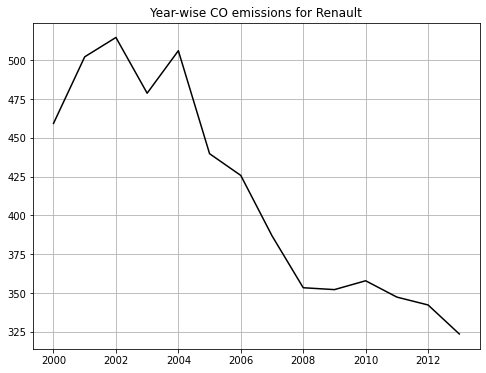

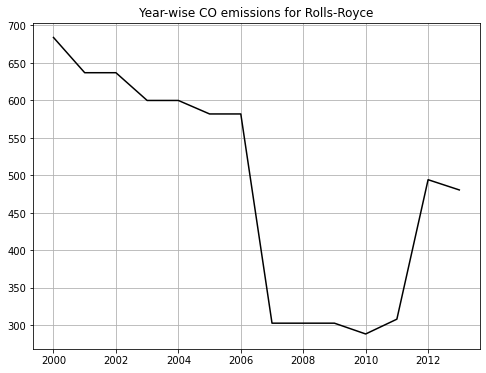

<Figure size 576x432 with 0 Axes>

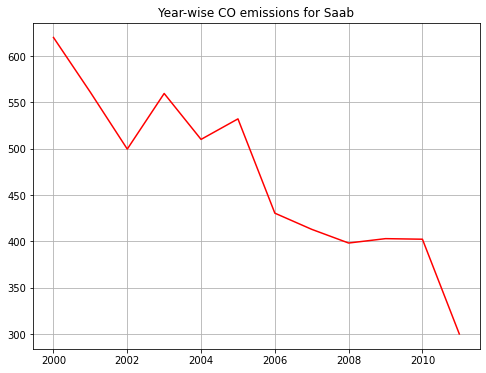

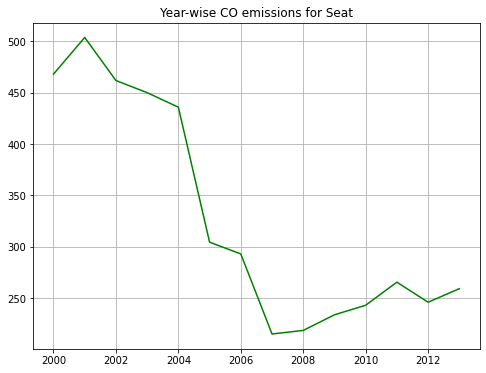

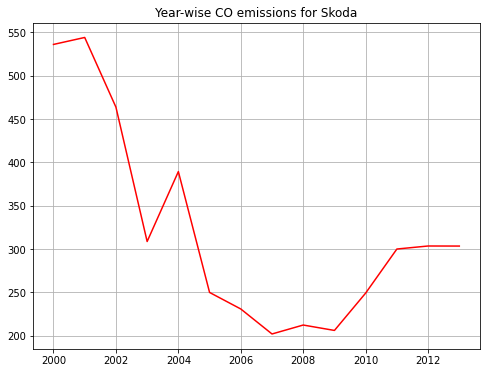

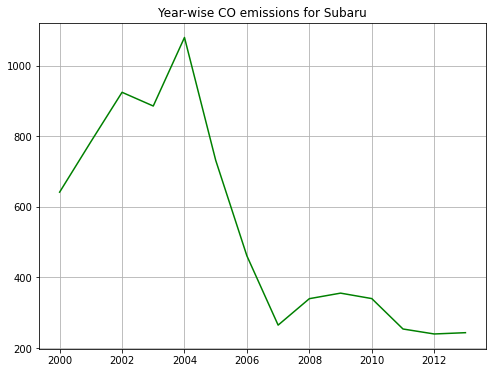

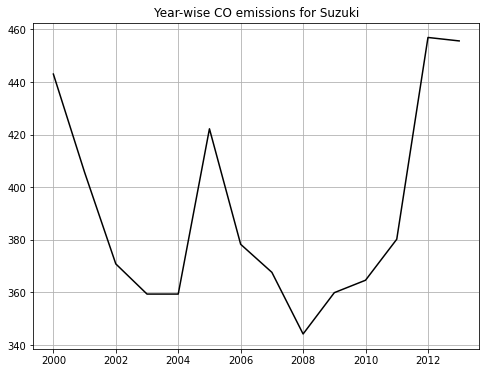

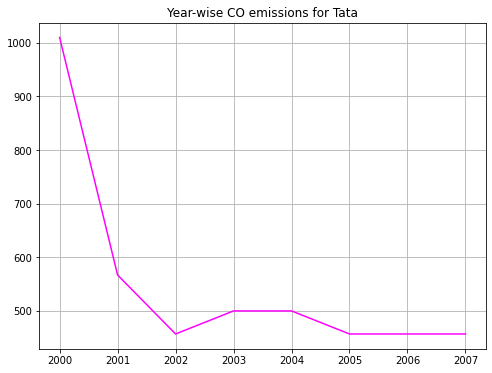

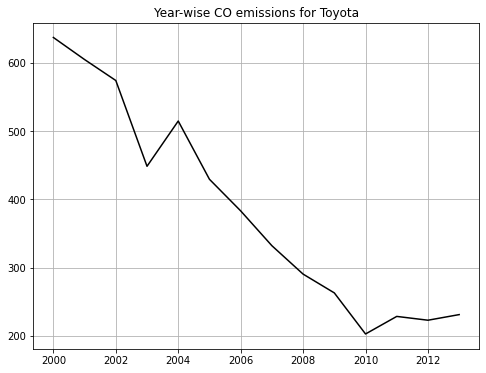

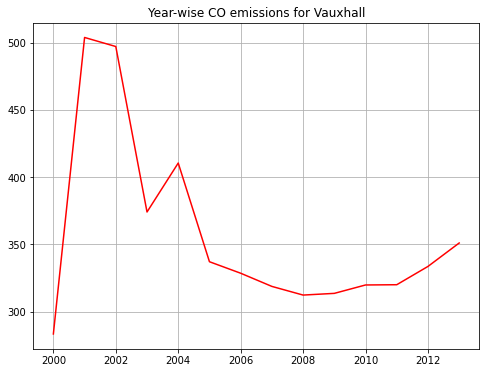

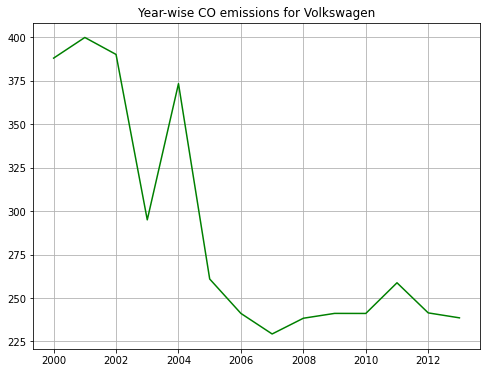

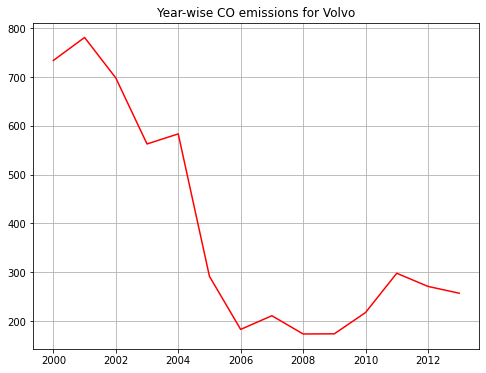

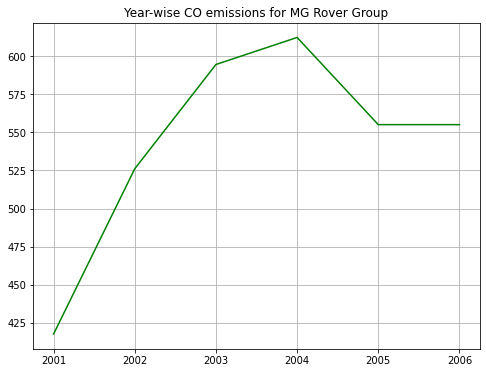

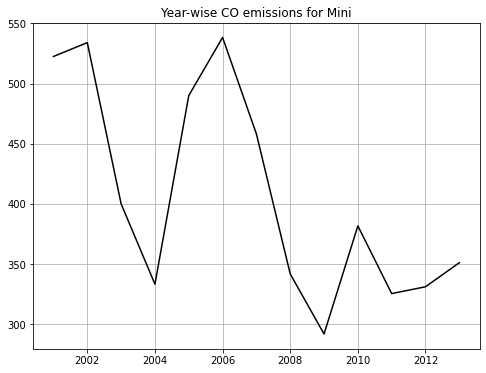

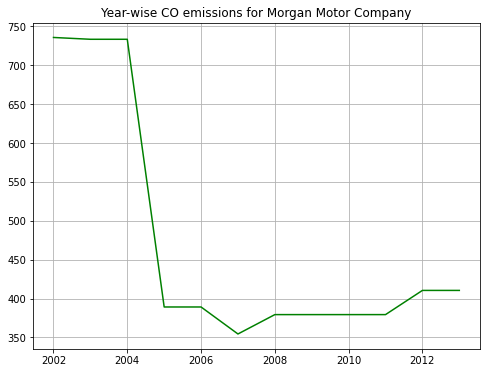

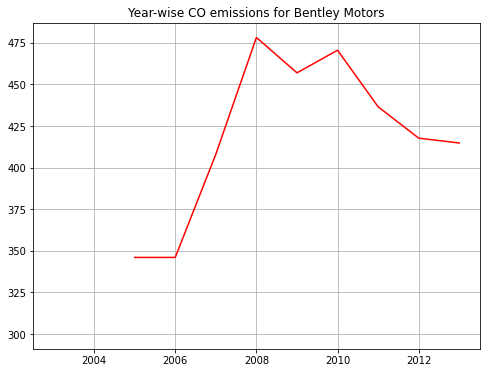

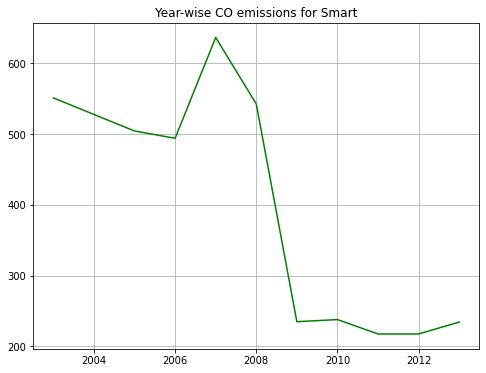

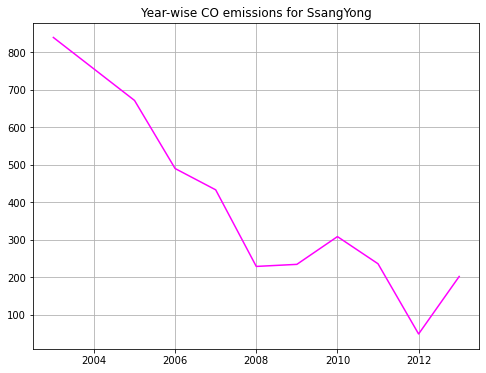

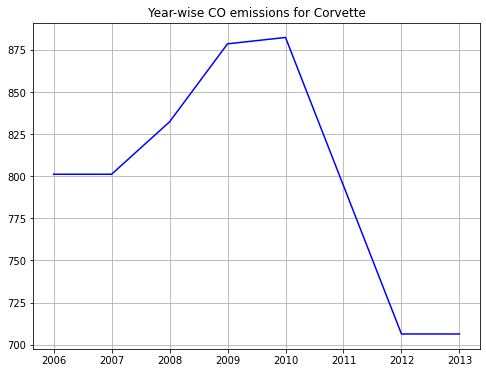

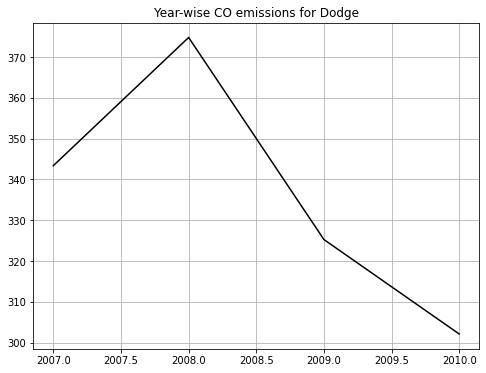

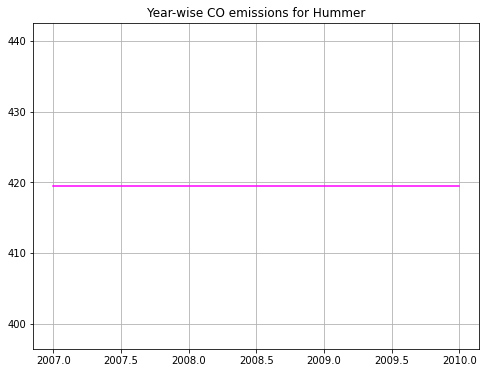

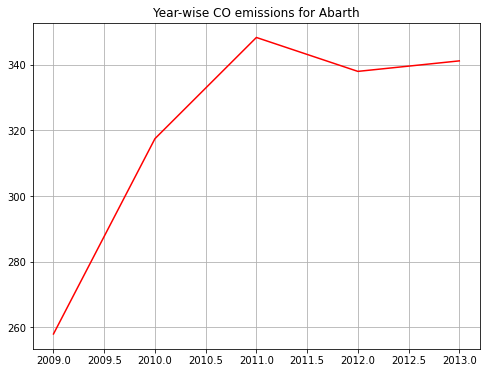

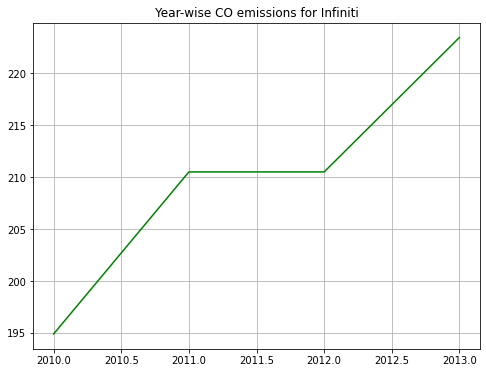

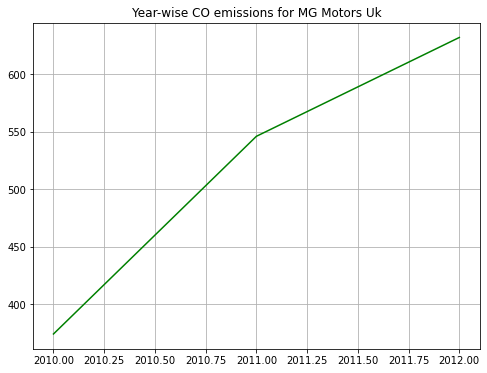

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [251]:
for company in  companies:
  plt.figure(figsize=(8,6))
  if len(company_yr_wise['co_emissions'].mean()[company]) < 3: continue
  plt.plot(company_yr_wise['co_emissions'].mean()[company], color = random.choice(np.array(['blue','green','red','magenta','black'])))
  plt.grid()
  plt.title('Year-wise CO emissions for '+company)


# Conclusions from CO emission trends of each company



1.   Most companies have done a good job at reducing CO emissions with a peak in one year
2.   Some companies like Suzuki, Roll-Royce and Ford have a decrease and then a significant increase in CO emissions
3. Companies like Isuzu, MG Rover, Bentley, Abarth and Infiniti have increasing trend showing that they need to focus on reducing CO emissions



# Average yearly Nitrous Oxide emissions of each company

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



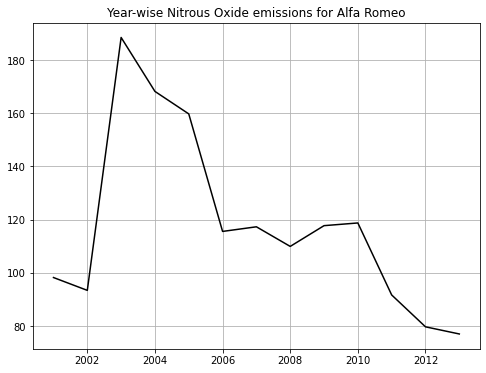

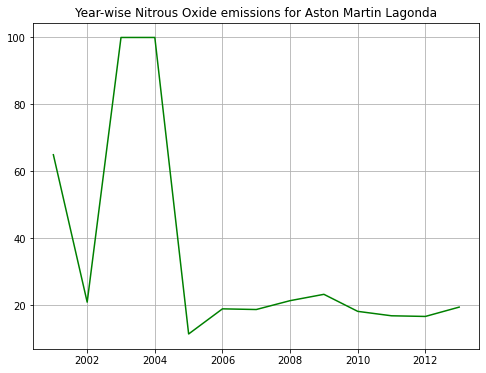

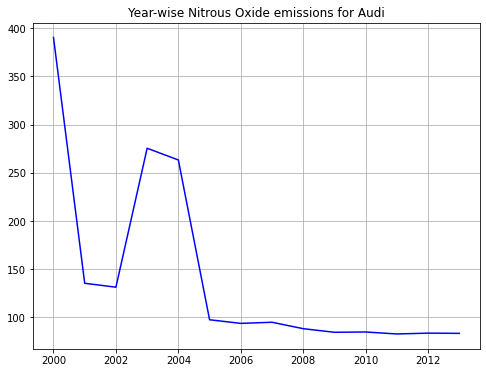

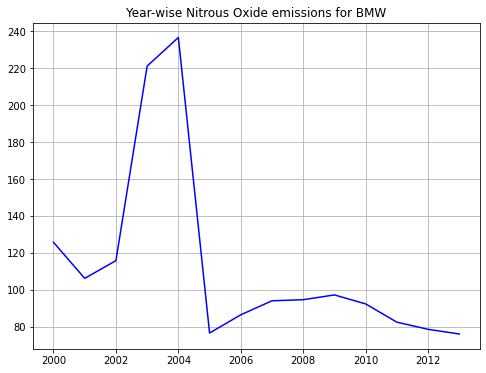

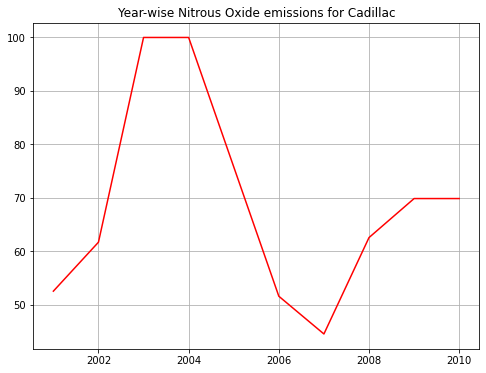

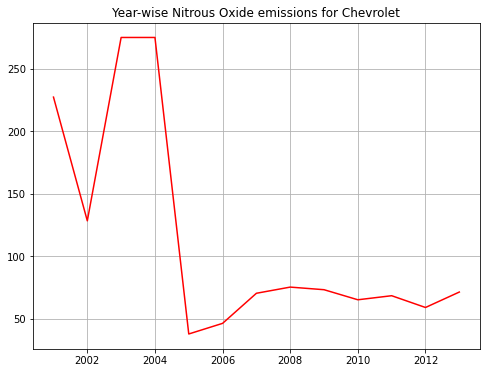

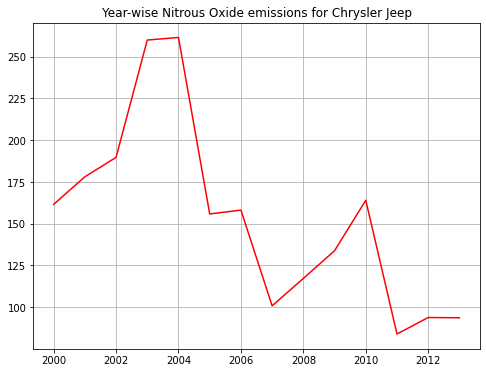

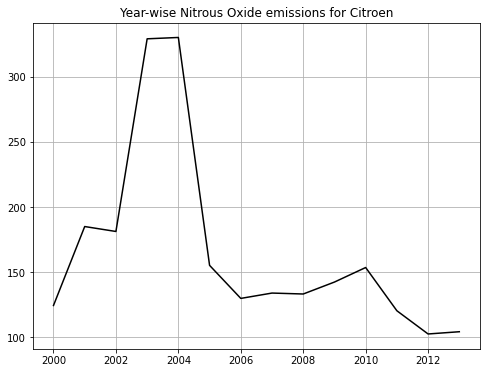

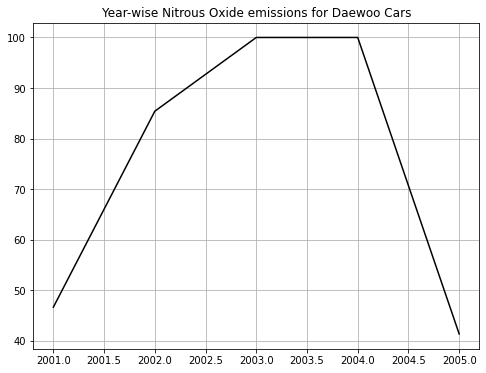

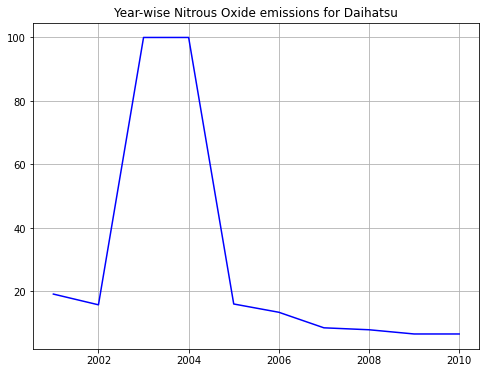

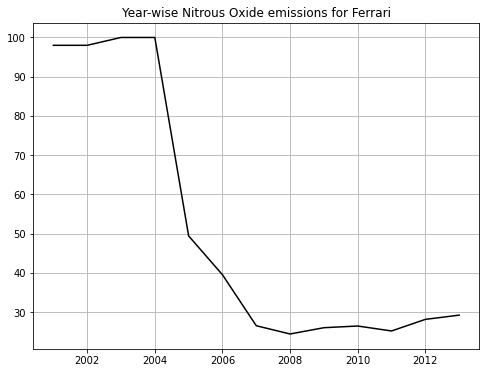

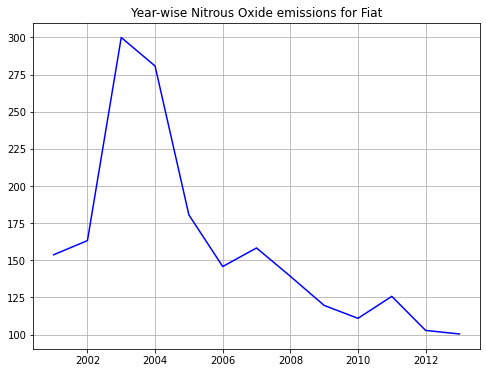

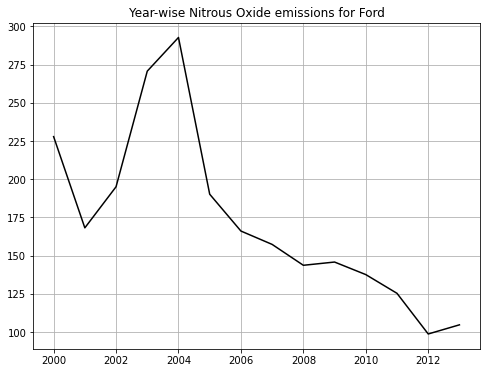

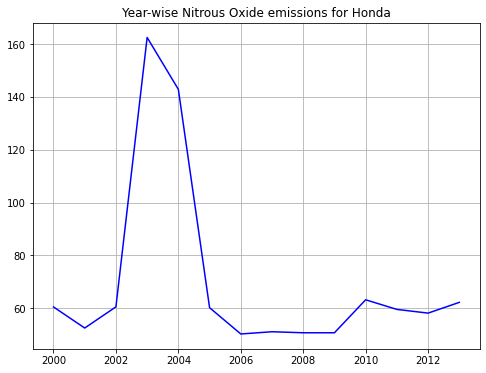

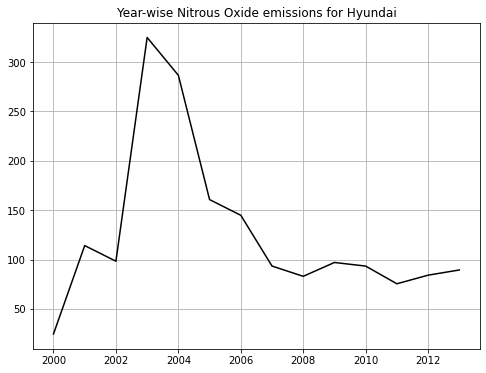

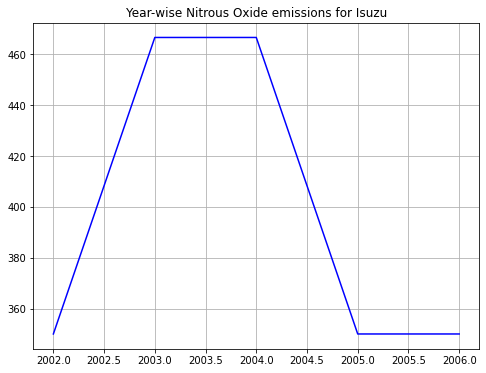

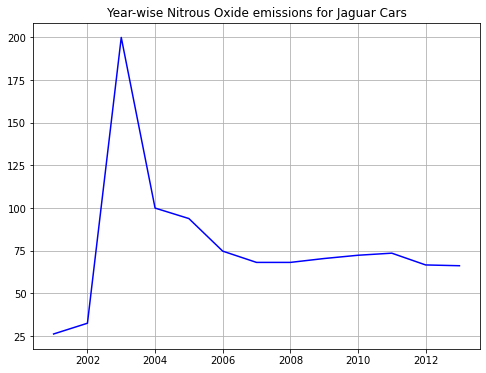

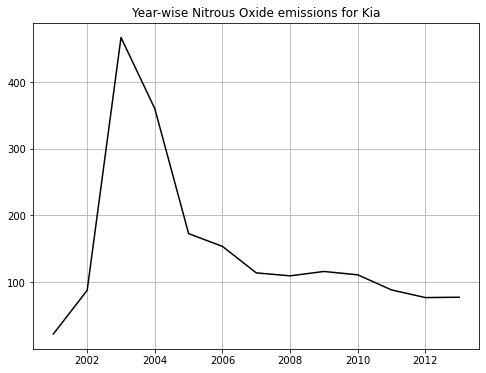

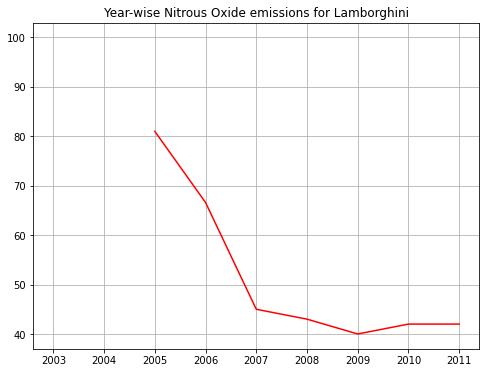

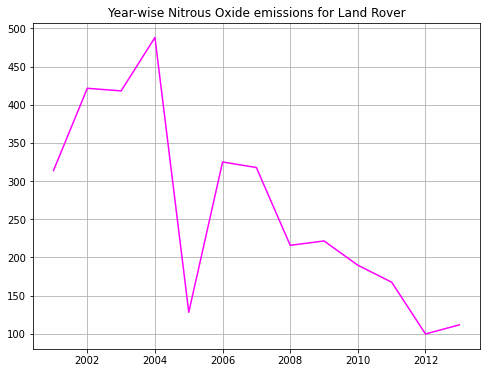

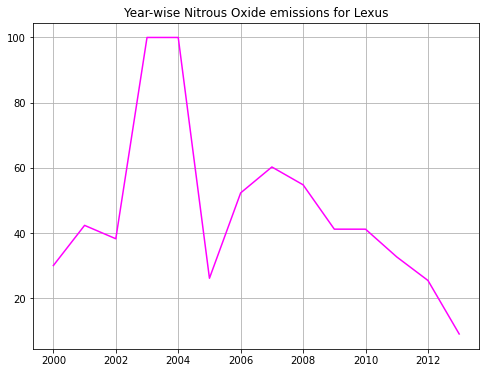

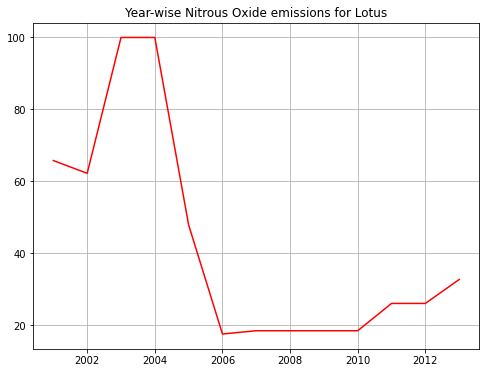

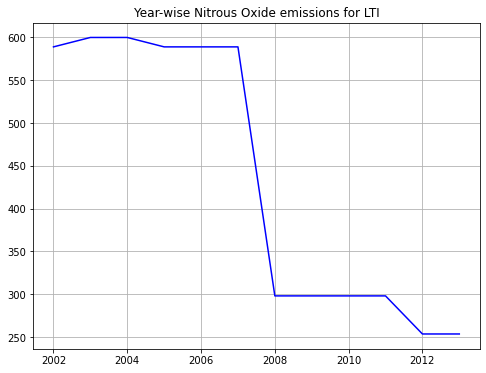

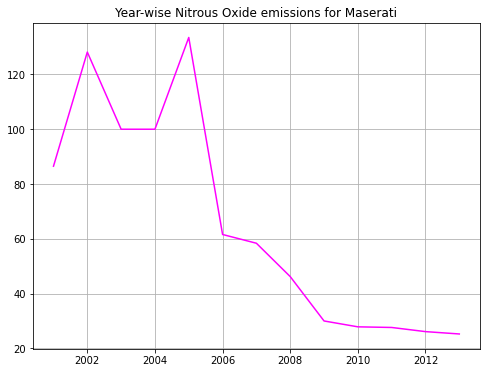

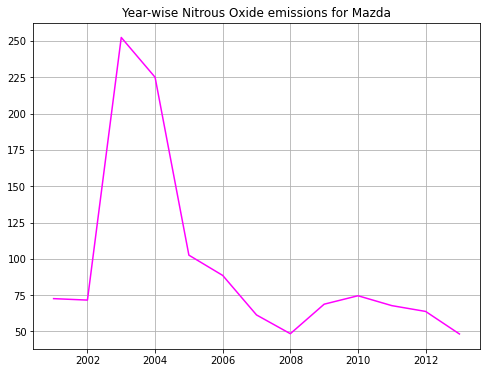

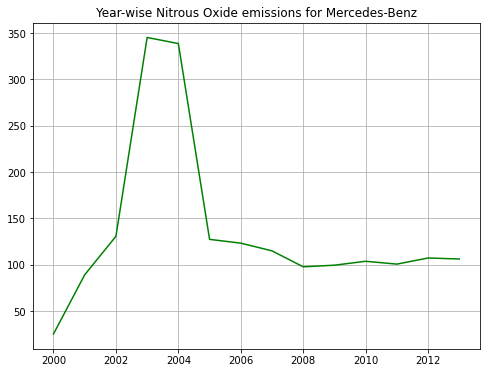

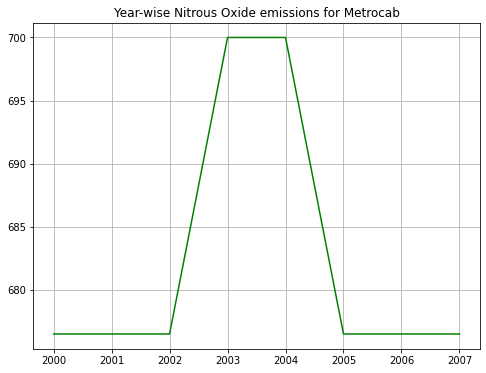

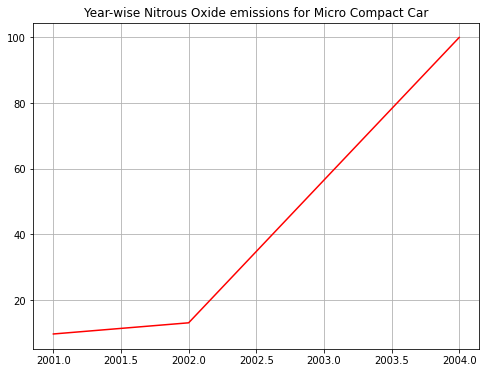

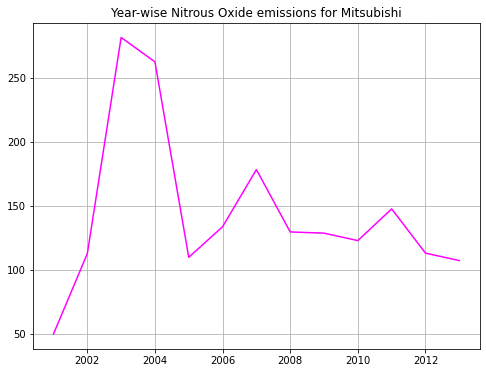

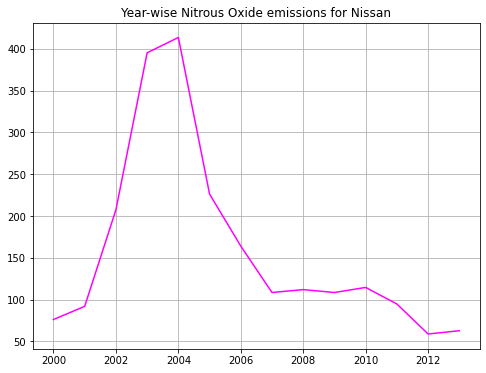

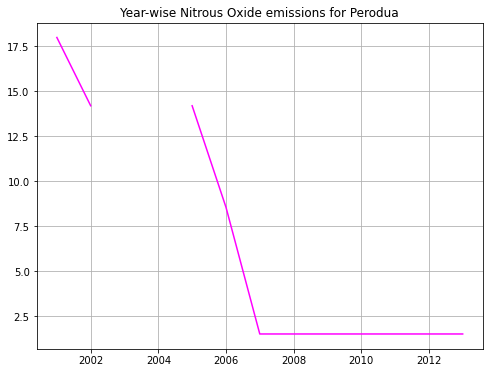

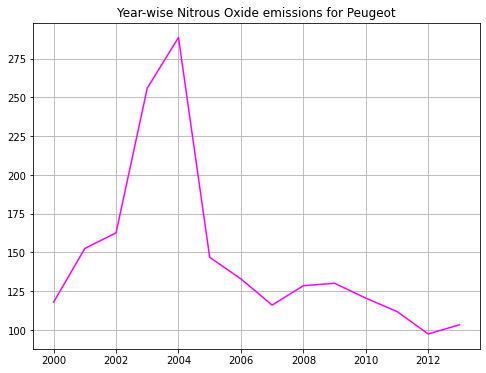

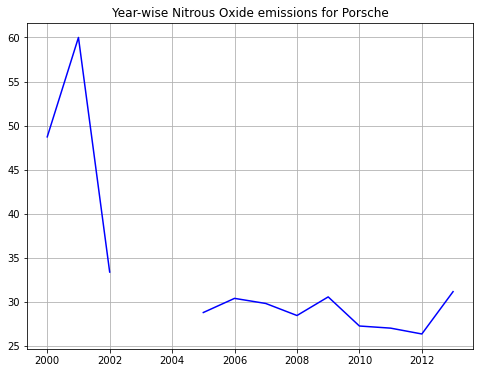

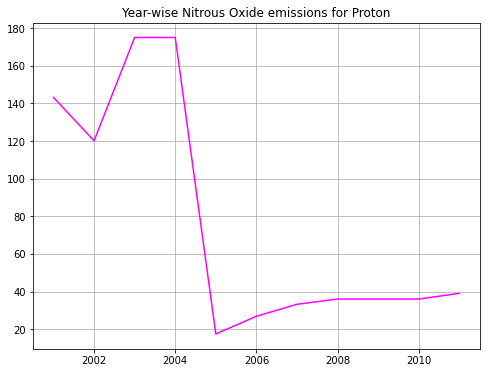

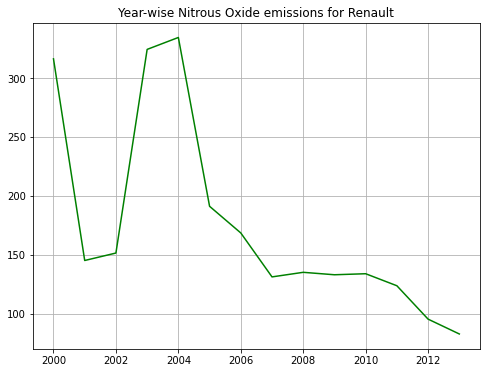

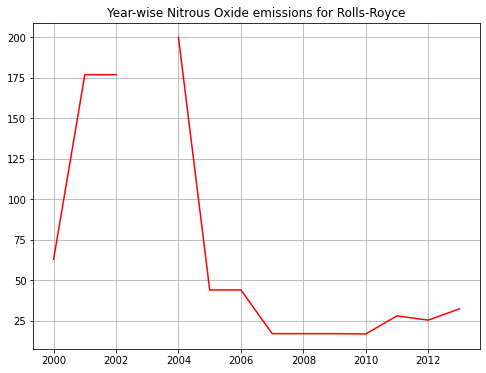

<Figure size 576x432 with 0 Axes>

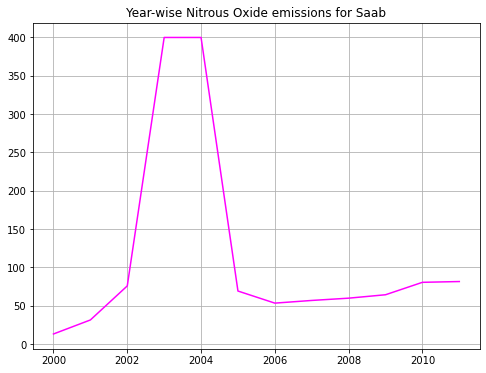

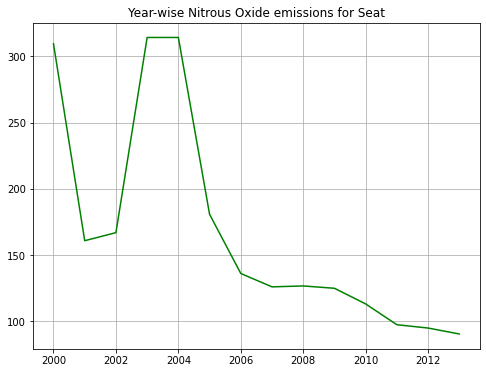

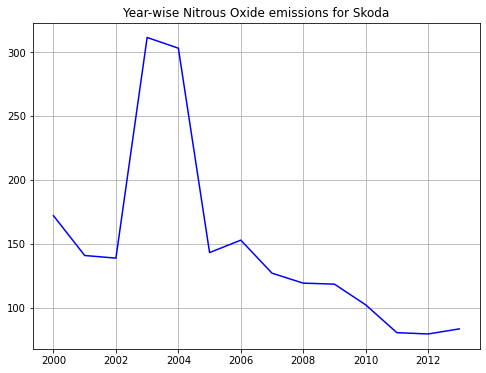

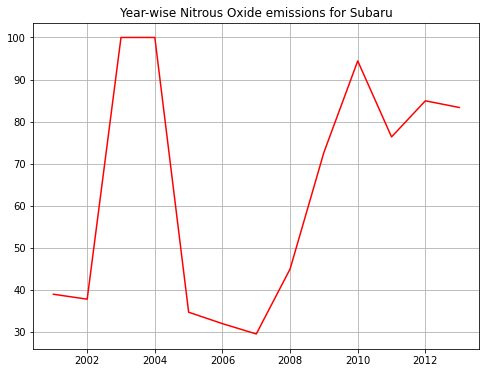

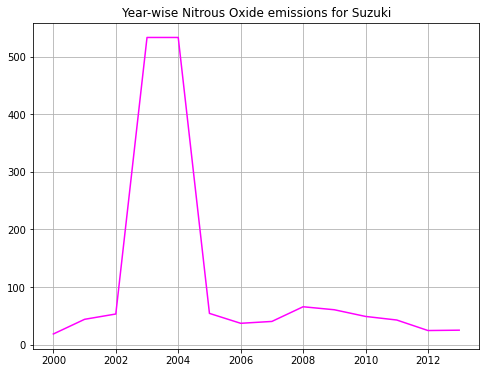

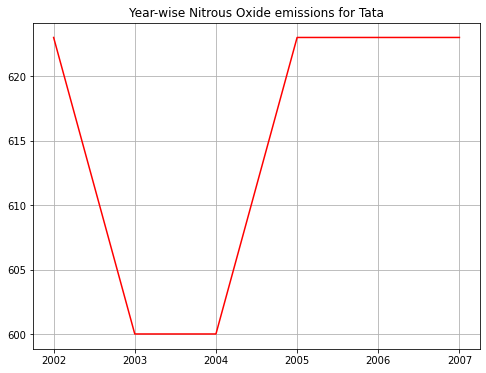

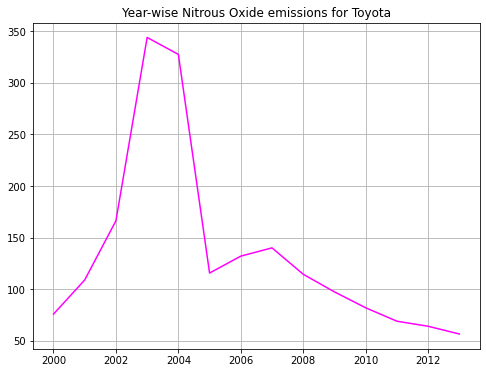

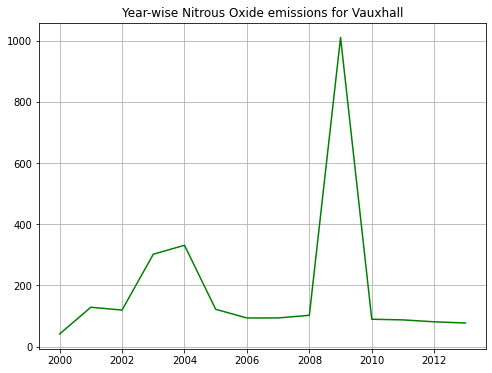

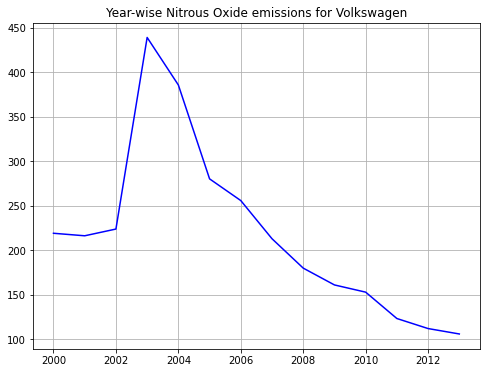

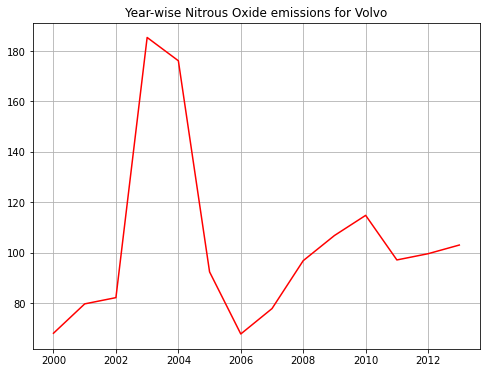

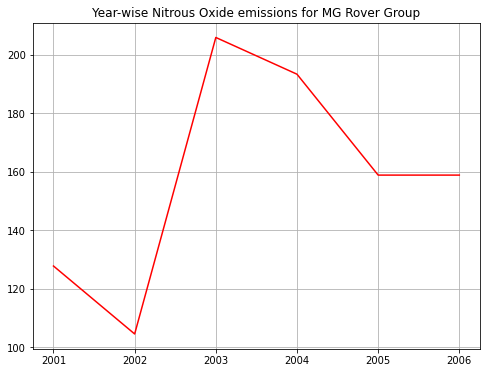

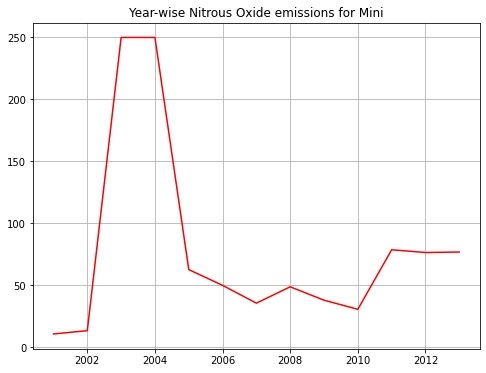

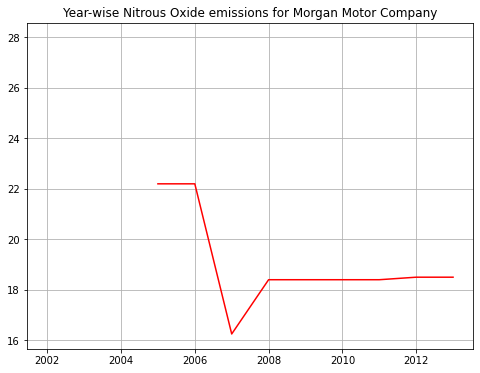

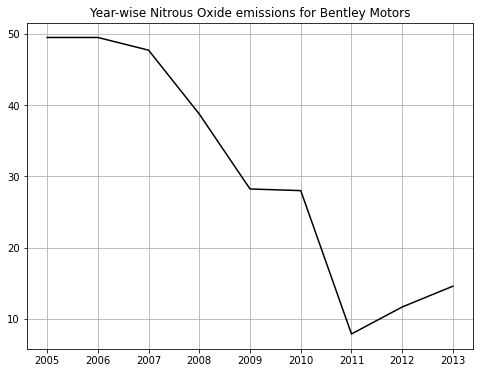

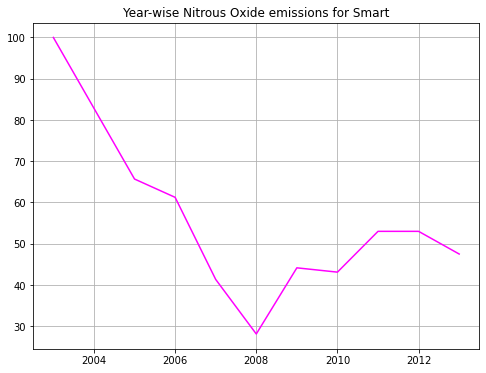

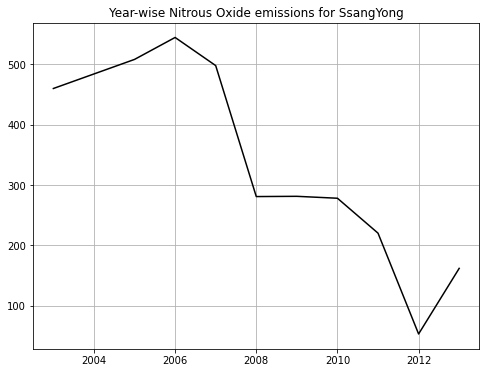

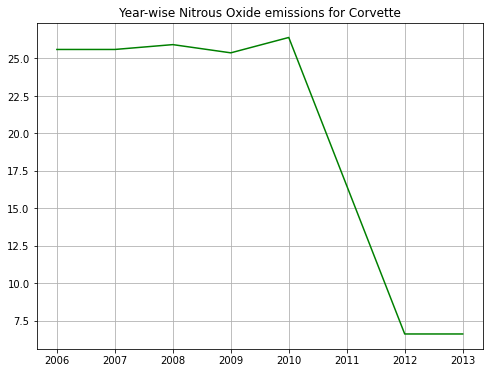

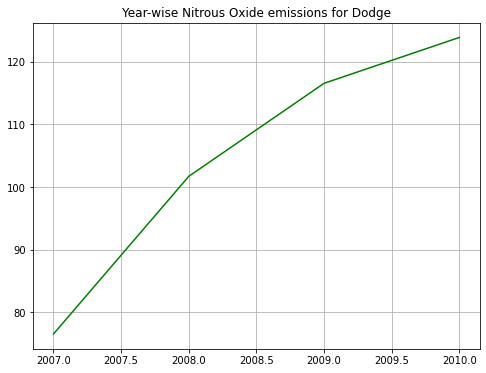

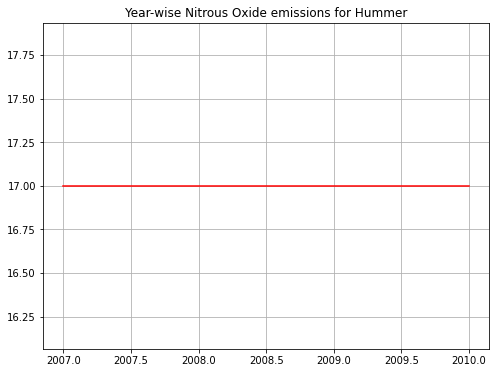

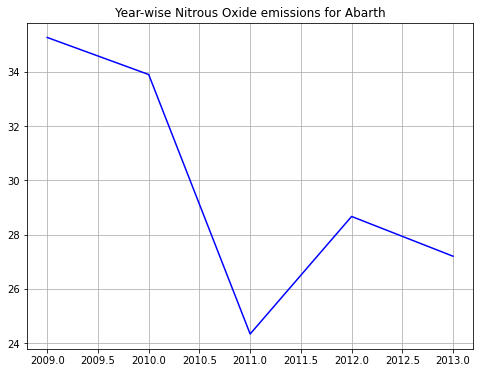

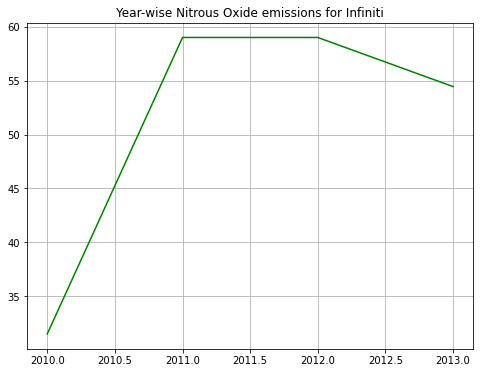

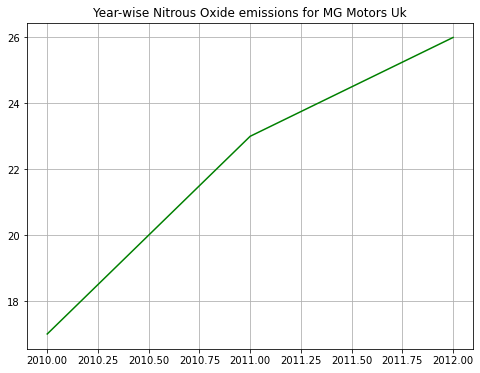

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [252]:
for company in  companies:
  plt.figure(figsize=(8,6))
  if len(company_yr_wise['nox_emissions'].mean()[company]) < 3: continue
  plt.plot(company_yr_wise['nox_emissions'].mean()[company],color = random.choice(np.array(['blue','green','red','magenta','black'])))
  plt.title('Year-wise Nitrous Oxide emissions for '+company)
  plt.grid()


# Conclusions from Nitrous Oxide emission trends of each company



1.   **Dodge** performs the worst with increasing NOX emissions each year
2.   **Ferrari and Lamborgini** do a good job with decreasing NOX emissions each year
3. **Hummer** does not seem to have made any progress at all



In [253]:
manufacturer = emission_data.groupby('manufacturer')
co2 = manufacturer['co2'].mean()
co = manufacturer['co_emissions'].mean()
nox = manufacturer['nox_emissions'].mean()

# Percentage contribution to CO2 emissions by each manufacturer

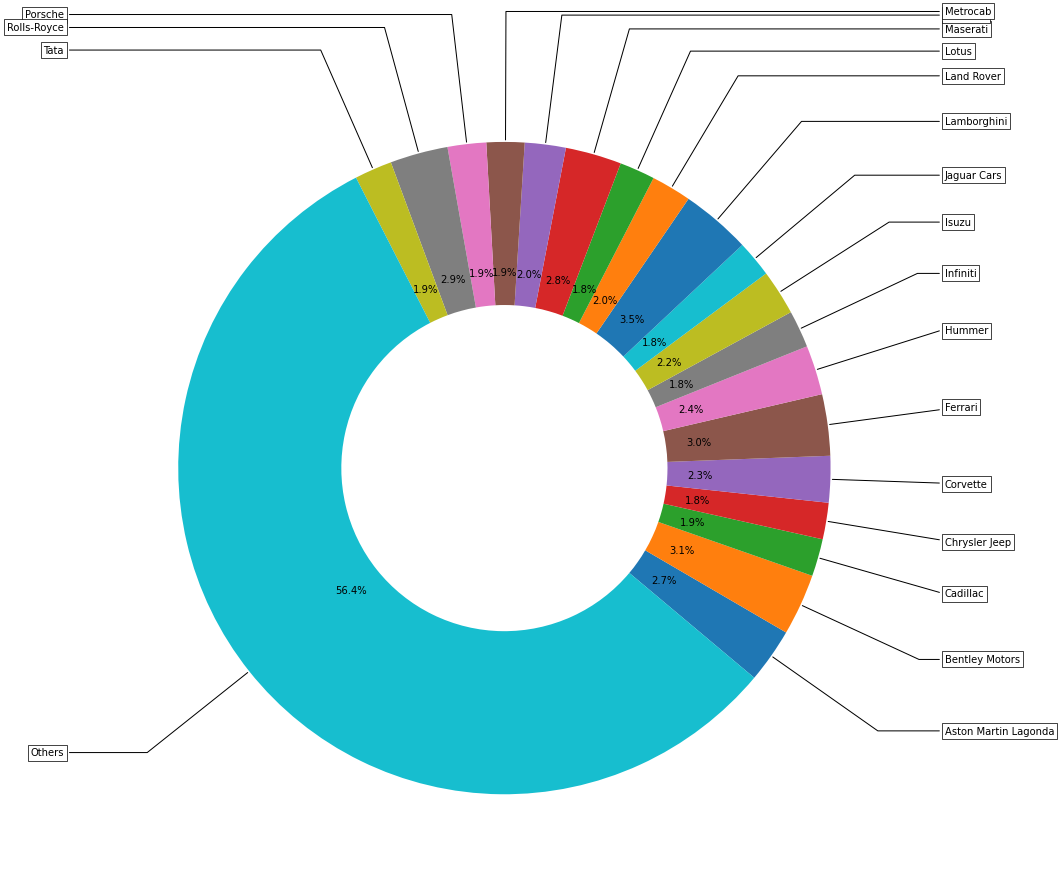

In [254]:
co2 = co2/co2.sum()

others = 0
co2_new = {}
for key in co2.keys():
  if co2[key]<0.017:
    others = others+co2[key]
  else:
    co2_new[key] = co2[key]
co2_new['Others'] = others

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))

wedges, texts,_ = ax.pie(co2_new.values(), wedgeprops=dict(width=0.5), startangle=-40,autopct="%.1f%%")

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(list(co2_new.keys())[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Matplotlib bakery: A donut")

plt.show()

# Conclusions from CO2 emissions distribution

Even though all companies more or less contribute equally to CO2emissions, it is important to note that **Lamborgini** contributes the most, individually

# Percentage contribution to CO emissions by each manufacturer

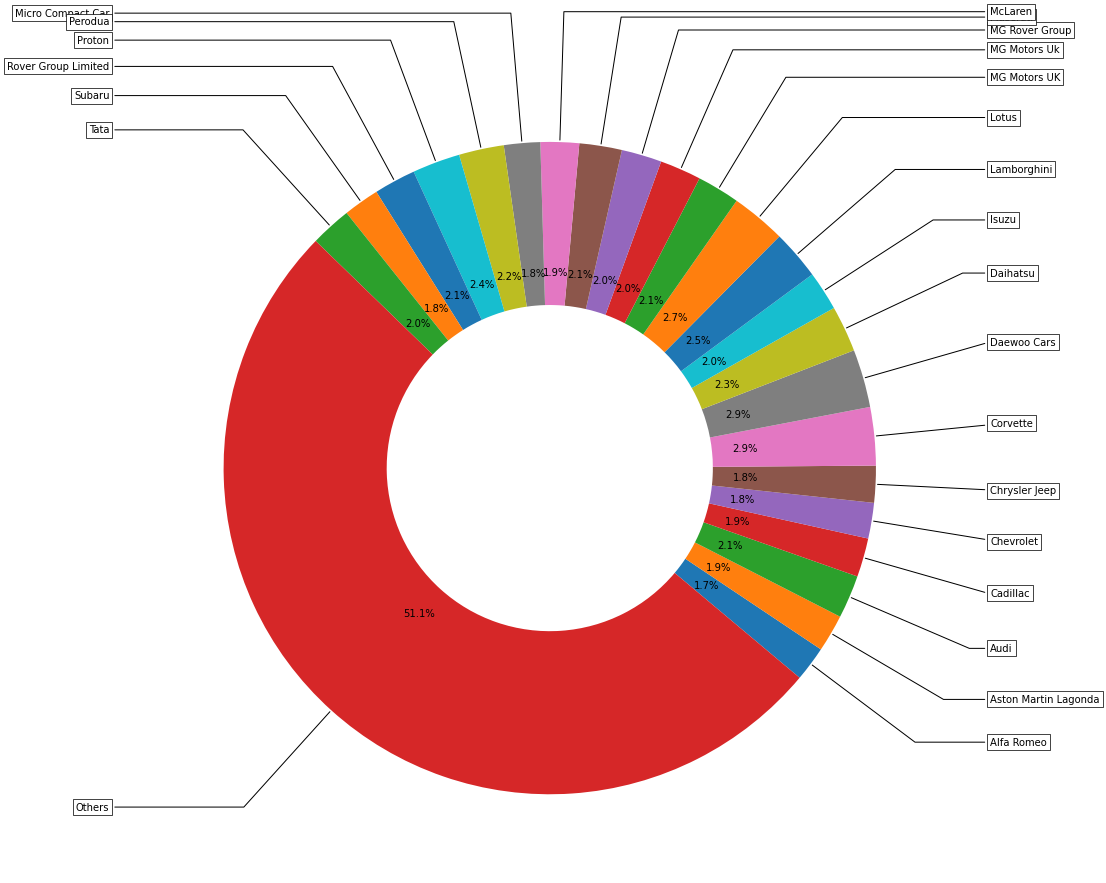

In [255]:
co = co/co.sum()

others = 0
co_new = {}
for key in co.keys():
  if co[key]<0.017:
    others = others+co[key]
  else:
    co_new[key] = co[key]
co_new['Others'] = others

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))

wedges, texts,_ = ax.pie(co_new.values(), wedgeprops=dict(width=0.5), startangle=-40,autopct="%.1f%%")

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(list(co_new.keys())[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Matplotlib bakery: A donut")

plt.show()

# Conclusions from CO emissions distribution

Even though all companies more or less contribute equally to CO emissions, it is important to note that **Corvette** and **Daewoo Cars** contribute the most, individually

# Percentage contribution to Nitrous Oxide emissions by each manufacturer

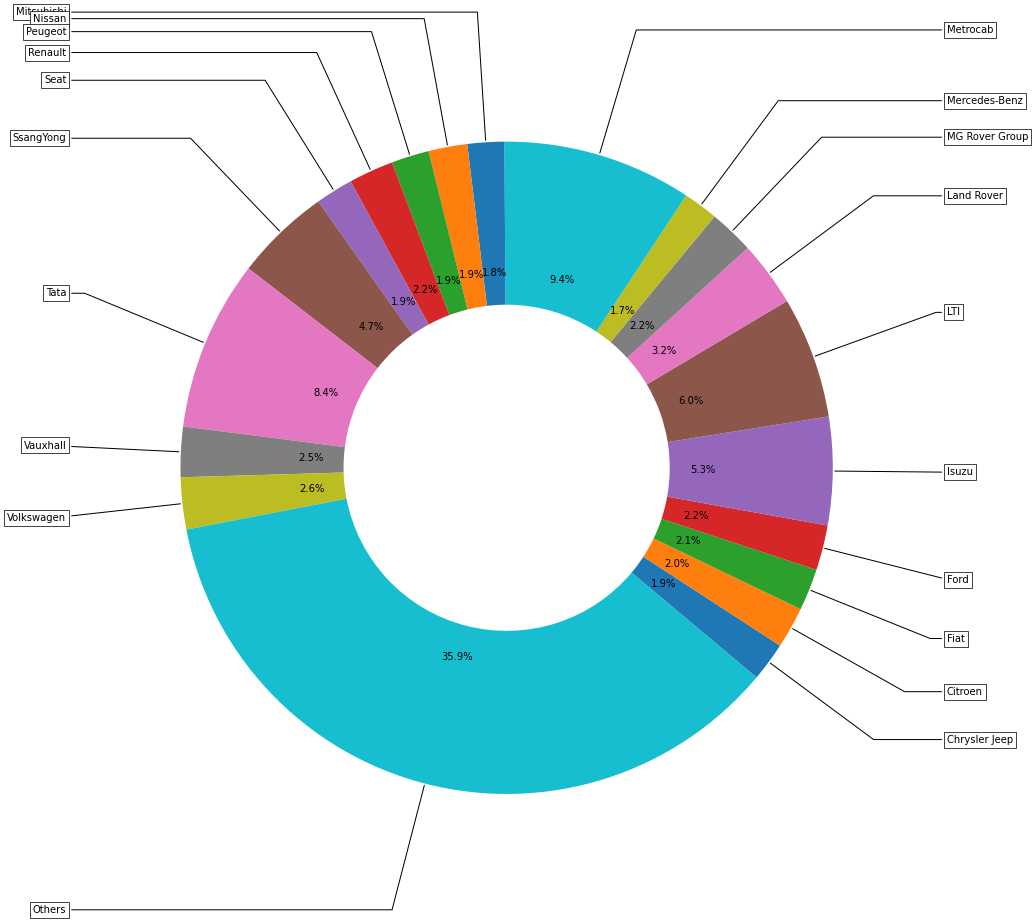

In [256]:
nox = nox/nox.sum()

others = 0
nox_new = {}
for key in nox.keys():
  if nox[key]<0.017:
    others = others+nox[key]
  else:
    nox_new[key] = nox[key]
nox_new['Others'] = others

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))

wedges, texts,_ = ax.pie(nox_new.values(), wedgeprops=dict(width=0.5), startangle=-40,autopct="%.1f%%")

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(list(nox_new.keys())[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Matplotlib bakery: A donut")

plt.show()

# Conclusions from Nitrous Oxides emissions distribution

**Metrocab**, individually, contributes the most to Nitrous Oxide emissions.

This can be expected as its a taxicab manufacturer and therefore doesn't have environmental protection as one of its primary goals

# Comparing pairs of companies over following parameters

Engine Capacity

Fuel Cost/mile

CO2 emissions

CO emissions

NItrous Oxide emissions

In [257]:
engine_cc = manufacturer['engine_capacity'].mean()
fuel_cost = manufacturer['fuel_cost'].mean()
co2 = manufacturer['co2'].mean()
co = manufacturer['co_emissions'].mean()
nox = manufacturer['nox_emissions'].mean()
noise = manufacturer['noise_level'].mean()

engine_cc = engine_cc/engine_cc.max()
fuel_cost = fuel_cost/fuel_cost.max()
co2 = co2/co2.max()
co = co/co.max()
nox = nox/nox.max()
noise = noise/noise.max()

In [258]:
import plotly.express as px
import plotly.graph_objects as go

In [259]:
def compare_companies(comp1,comp2):

  categories = ['Engine Capacity','Fuel Cost','CO2 emissions',
            'CO emissions', 'Nitrous Oxide Emissions']


  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
        r=[engine_cc[comp1], fuel_cost[comp1], co2[comp1], co[comp1], nox[comp1]],
        theta=categories,
        fill='toself',
        name=comp1
  ))
  fig.add_trace(go.Scatterpolar(
        r=[engine_cc[comp2], fuel_cost[comp2], co2[comp2], co[comp2], nox[comp2]],
        theta=categories,
        fill='toself',
        name=comp2
  ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        visible=True,
        range=[0, 1]
      )),
    showlegend=True
  )

  fig.show()

In [260]:
compare_companies('Renault','Nissan')
compare_companies('Honda','Toyota')
compare_companies('Volvo','Volkswagen')
compare_companies('Audi','BMW')
compare_companies('Porsche','Lamborghini')

# 5 Car price-segments have been taken for head to head comparison of companies involved in manufacturing them



1.   Cheap segment - Renault and Nissan
2.   Lower Mid-range segment - Honda and Toyota
3.   Upper Mid-range segment - Volvo and Volkswagen
4.   Luxury segment - Audi and BMW
5.   Sports segment - Porsche and Lamborghini

Conclusions



1.   Renault and Nissan perform more or less same in all the areas, which is expected in the low price segment as their is a lot of competition
2.   Honda and Toyota perform more or less same in all the areas, which is expected in the lower mid-range segment as their is a also a fair amount of competition
3. Volvo and Volkswagen perform similar in all areas except for two. In CO emissions, Volvo seems to perform worse than Volkswagen while the opposite is true in the case of Nitrous Oxides emissions
4. Audi and BMW perform similar in all areas except CO emissions where Audi performs a lot worse than BMW. Hence, it is advisable to buy a BMW
5. Lamborgini performs very bad in comparison to Porshe in all the areas showing that Lamborghini doesn't have environmental protection as one of its goals





# Correlation between independent variables (engine_capacity, fuel_cost) and candidate dependent variabeles (co1, co_emissions, nox_emissions)

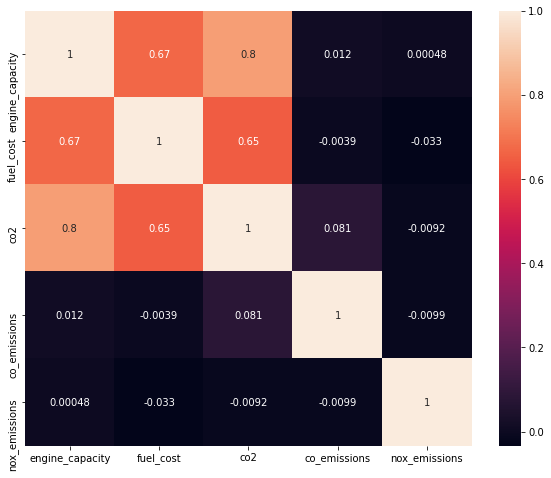

In [261]:
Var_Corr = emission_data[['engine_capacity','fuel_cost','co2','co_emissions','nox_emissions']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# Conclusions from Correlation Heat Map

1.   CO2 emissions have a strong correlation with the dependent variables
2.   CO and Nitrous Oxide emissions donot seem to have a strong correlation with the dependent variables
3. Goes to show that we may find a definite function for CO2 emissions but not necessarily for CO and Nitrous Oxides



# Independent Variables - engine_capacity, fuel_cost

# Candidate Dependent Variables - co2, co_emissions, nox_emissions

In [262]:
df = emission_data[['engine_capacity','fuel_cost','co2','co_emissions','nox_emissions']]
df

engine_capacity  fuel_cost  co2  co_emissions  nox_emissions
0               1598.0   0.103000  195         980.0            NaN
1               1747.0   0.105500  200        1105.0            NaN
2               1970.0   0.110500  210        1103.0            NaN
3               1598.0   0.104333  195         980.0            NaN
4               1747.0   0.105500  200        1105.0            NaN
...                ...        ...  ...           ...            ...
45506           1968.0   0.109667  122         165.0           74.0
45507           1984.0   0.133167  139         409.0           38.0
45508           1984.0   0.133167  139         409.0           38.0
45509           1984.0   0.142250  148         357.0           54.0
45510           1984.0   0.142250  149         357.0           54.0

[45511 rows x 5 columns]

# Removing rows with even a single null value

In [263]:
df = df.dropna()
df

engine_capacity  fuel_cost  co2  co_emissions  nox_emissions
65              1896.0   0.069500  146         180.0          430.0
66              1896.0   0.089000  186         220.0          470.0
82              2496.0   0.104167  219           4.0          318.0
83              2496.0   0.115833  243         117.0          343.0
97              1895.0   0.095333  183         722.0           47.0
...                ...        ...  ...           ...            ...
45506           1968.0   0.109667  122         165.0           74.0
45507           1984.0   0.133167  139         409.0           38.0
45508           1984.0   0.133167  139         409.0           38.0
45509           1984.0   0.142250  148         357.0           54.0
45510           1984.0   0.142250  149         357.0           54.0

[39937 rows x 5 columns]

# Now we are analysing if we can characterise the dependent variables as a function of the independent variables by **looking at their one-one scatter plots**

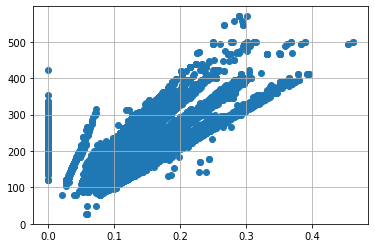

In [264]:
plt.scatter(x = df['fuel_cost'],y = df['co2'])
plt.grid()


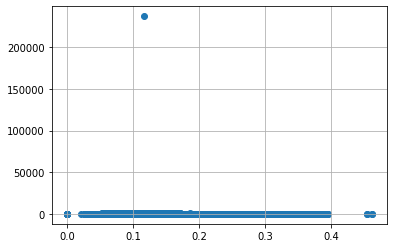

In [265]:
plt.scatter(x = df['fuel_cost'],y = df['nox_emissions'])
plt.grid()


We see that their exists an **OUTLIER** and we need to remove that first before proceeding ahead

In [266]:
ind = []
for row,val in enumerate(df['nox_emissions'].values):
  if val>50000:
    ind.append(row)
    print(val)

237000.0


In [267]:
ind

[23470]

In [268]:
df.iloc[23470]

engine_capacity      2959.000
fuel_cost               0.116
co2                   194.000
co_emissions          102.000
nox_emissions      237000.000
Name: 29030, dtype: float64

In [269]:
df_new = df.drop(index = 29030)

# Outlier removed and we see that nox_emissions donot show a definite functional dependence on fuel_cost

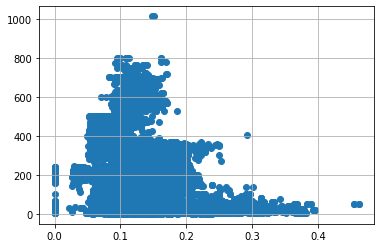

In [270]:
plt.scatter(x = df_new['fuel_cost'],y = df_new['nox_emissions'])
plt.grid()


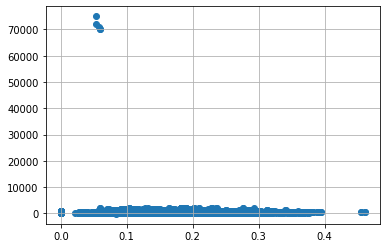

In [271]:
plt.scatter(x = df_new['fuel_cost'],y = df_new['co_emissions'])
plt.grid()


We see that their exists some **OUTLIERS** and we need to remove that first before proceeding ahead

In [272]:
ind = []
for row,val in enumerate(df['co_emissions'].values):
  if val>10000:
    ind.append(row)
    print(val)

70000.0
70000.0
75000.0
71000.0
72000.0


In [273]:
df.iloc[ind]

engine_capacity  fuel_cost  co2  co_emissions  nox_emissions
12339           3936.0   0.059167  265       70000.0          384.0
12340           3936.0   0.059167  265       70000.0          384.0
12351           2496.0   0.053083  238       75000.0          375.0
12352           2496.0   0.057417  257       71000.0          406.0
12353           2496.0   0.053083  238       72000.0          426.0

In [274]:
df_new = df_new.drop(index = [12339,12340,12351,12352,12353])

# Outlier removed and we see that co_emissions donot show a definite functional dependence on fuel_cost

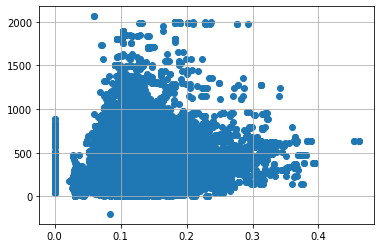

In [275]:

plt.scatter(x = df_new['fuel_cost'],y = df_new['co_emissions'])
plt.grid()


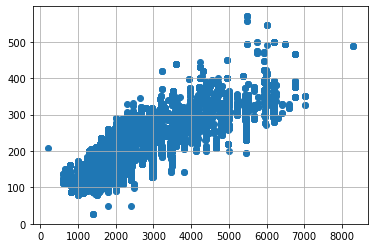

In [276]:
plt.scatter(x = df_new['engine_capacity'],y = df_new['co2'])
plt.grid()


# co_emissions donot show a definite functional dependence on engine_capacity

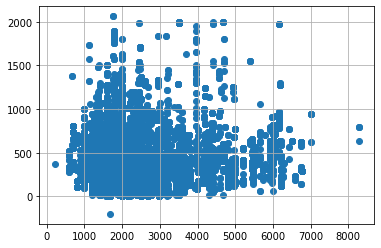

In [277]:
plt.scatter(x = df_new['engine_capacity'],y = df_new['co_emissions'])
plt.grid()


# nox_emissions donot show a definite functional dependence on engine_capacity

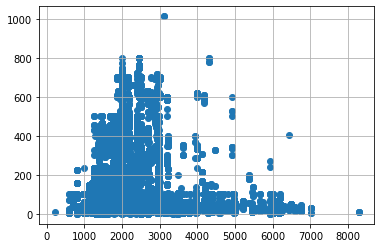

In [278]:
plt.scatter(x = df_new['engine_capacity'],y = df_new['nox_emissions'])
plt.grid()


# We observe that only **co2** is a definite function of independent variables engine_capacity and fuel_cost

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Linear Regression on co2 as a function of engine_capacity and fuel_cost

In [280]:
X = df_new[['engine_capacity','fuel_cost']]
y = df_new[['co2']]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print('Training set size =',X_train.shape)
print('Validation set size =',X_val.shape)
print('Test set size =',X_test.shape)


Training set size = (31944, 2)
Validation set size = (3994, 2)
Test set size = (3993, 2)


Fitting Linear Model

In [281]:
reg = LinearRegression().fit(X_train, y_train)

Weights

In [282]:
reg.coef_

array([[3.93529289e-02, 3.15443205e+02]])

Bias

In [283]:
reg.intercept_

array([61.35130574])

In [284]:
from sklearn.metrics import mean_squared_error

Validation RMSE error

In [285]:
y_val_pred = reg.predict(X_val)
val_error = np.sqrt(mean_squared_error(y_val,y_val_pred))
val_error

31.668359911446302

Test RMSE Error

In [286]:
y_test_pred = reg.predict(X_test)
test_error = np.sqrt(mean_squared_error(y_test,y_test_pred))
test_error

31.43925155173981

In [287]:
import tensorflow as tf
from tensorflow import keras

Building a Neural Network of

2 Hidden Layers

4 Units in each hidden layer

In [288]:
inputs = keras.Input(shape=(2,))
x = keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
x = keras.layers.Dense(4, activation=tf.nn.relu)(x)
outputs = keras.layers.Dense(1, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [289]:
print(model.summary())

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
None


In [290]:
model.compile(optimizer='rmsprop', loss='mse',metrics=[keras.metrics.RootMeanSquaredError()])

Fitting NN model

In [291]:
model.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),epochs=5)

Epoch 1/5
999/999 [==============================] - 1s 1ms/step - loss: 37341.9609 - root_mean_squared_error: 193.2407 - val_loss: 36571.8711 - val_root_mean_squared_error: 191.2377
Epoch 2/5
999/999 [==============================] - 1s 1ms/step - loss: 37341.9766 - root_mean_squared_error: 193.2407 - val_loss: 36571.8711 - val_root_mean_squared_error: 191.2377
Epoch 3/5
999/999 [==============================] - 1s 1ms/step - loss: 37341.9961 - root_mean_squared_error: 193.2408 - val_loss: 36571.8711 - val_root_mean_squared_error: 191.2377
Epoch 4/5
999/999 [==============================] - 1s 1ms/step - loss: 37342.0000 - root_mean_squared_error: 193.2408 - val_loss: 36571.8711 - val_root_mean_squared_error: 191.2377
Epoch 5/5
999/999 [==============================] - 1s 1ms/step - loss: 37341.9766 - root_mean_squared_error: 193.2407 - val_loss: 36571.8711 - val_root_mean_squared_error: 191.2377


Validation RMSE error

In [292]:
y_nn_val_pred = model.predict(X_val)
val_error = np.sqrt(mean_squared_error(y_val,y_val_pred))
val_error

31.668359911446302

Test RMSE error

In [293]:
y_nn_test_pred = model.predict(X_test)
test_error = np.sqrt(mean_squared_error(y_test,y_test_pred))
test_error

31.43925155173981

In [294]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [295]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [296]:
X_train.values

array([[1.49800000e+03, 1.37083333e-01],
       [1.56000000e+03, 8.55000000e-02],
       [1.39800000e+03, 1.13250000e-01],
       ...,
       [1.39000000e+03, 1.44250000e-01],
       [1.99700000e+03, 1.11000000e-01],
       [1.99800000e+03, 1.07750000e-01]])

In [297]:
y_train.values.reshape(y_train.shape[0])

array([149, 125, 120, ..., 152, 221, 183])

In [298]:
regr.fit(X_train.values, y_train.values.reshape(y_train.shape[0]))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [299]:
y_svm_val_pred = regr.predict(X_val)
val_error = np.sqrt(mean_squared_error(y_val,y_svm_pred))
val_error

31.49333542650797

In [300]:
y_svm_test_pred = regr.predict(X_test)
test_error = np.sqrt(mean_squared_error(y_val,y_svm_pred))
test_error

31.49333542650797

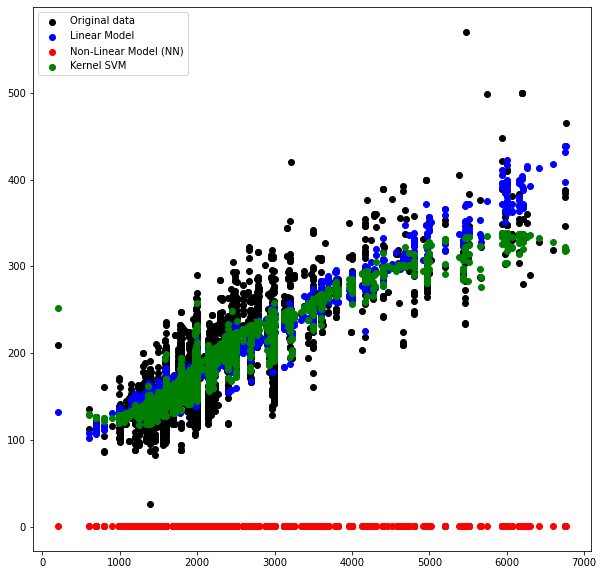

In [301]:
plt.figure(figsize=(10,10))
plt.scatter(X_test['engine_capacity'],y_test,color='black')
plt.scatter(X_test['engine_capacity'],y_test_pred,color='blue')
plt.scatter(X_test['engine_capacity'],y_nn_test_pred,color='red')
plt.scatter(X_test['engine_capacity'],y_svm_test_pred,color='green')
plt.legend(['Original data', 'Linear Model', 'Non-Linear Model (NN)','Kernel SVM'])

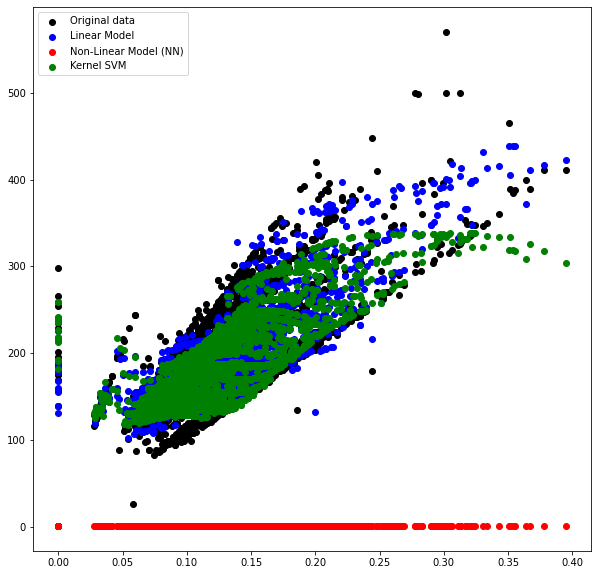

In [302]:
plt.figure(figsize=(10,10))
plt.scatter(X_test['fuel_cost'],y_test,color='black')
plt.scatter(X_test['fuel_cost'],y_test_pred,color='blue')
plt.scatter(X_test['fuel_cost'],y_nn_test_pred,color='red')
plt.scatter(X_test['fuel_cost'],y_svm_test_pred,color='green')
plt.legend(['Original data', 'Linear Model', 'Non-Linear Model (NN)','Kernel SVM'])

# Conclusion on Dependence of CO2 emissions on Engine Capacity and Fuel Cost



1.   Looking at scatter plots with respect to both Engine Capacity and Fuel Cost, we can go ahead with Linear Model
2.   Comparing results of Linear Model, NN model and Kernel SVM, we see that Linear Model performs far better than a Non-Linear model
3. We also see that Kernel SVM follows the Linear Model, further validating that a Linear Model is being followed by CO2 emissions
4. We can therefore conclude that a Linear model represents the CO2 emissions' dependence on Engine Capacity and Fuel Cost better than a Non-Linear Model 

